<a href="https://colab.research.google.com/github/harvey-py/COMP3010/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [321]:
# Basics
import numpy as np
import pandas as pd
from scipy import stats
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import os
import time

# Regression
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ML Tools
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# RF
from sklearn.ensemble import RandomForestRegressor

# XGB
import xgboost as xgb
from xgboost import XGBRegressor

# NN
import math
import torch
import torch.nn as nn
import tensorflow
import optuna
import optuna.visualization as opt_vis
import copy

## Config

In [2]:
# working_dir = "~/Documents/GitHub/COMP3010/Assignment/Data/"

# train_dir = os.path.join(working_dir, "train.csv")
# test_dir = os.path.join(working_dir, "test.csv")

train_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/train.csv"
test_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/test.csv"

## Importing Data

In [3]:
raw_data = pd.read_csv(train_dir)
raw_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

In [4]:
raw_test_data = pd.read_csv(test_dir)
raw_test_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

# Exploratory Analysis

## Variables

In [5]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

In [6]:
raw_data

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0       3203.0                         7.32              0.42            2.42   
1       3204.0                         7.18              0.42            2.39   
2       3205.0                         7.32              0.41            2.39   
3       3206.0                         7.26              0.42            2.40   
4       3207.0                         7.32              0.42            2.40   
...        ...                          ...               ...             ...   
10045  10244.0                        36.91              0.64            1.58   
10046  12758.0                        16.44              0.55            0.80   
10047   9438.0                        36.26              0.57            2.38   
10048   8689.0                        14.27              0.50            2.21   
10049  10302.0                        35.52              0.63            1.60   

       Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                 5.39             1.00              1.79               0.60   
1                 5.39             1.01              1.81               0.59   
2                 5.38             1.00              1.78               0.62   
3                 5.41             1.00              1.81               0.61   
4                 5.41             1.02              1.79               0.62   
...                ...              ...               ...                ...   
10045             9.39             0.58              1.01               0.22   
10046             5.58             1.99              1.60               0.82   
10047             2.62             2.80              0.60               1.19   
10048             8.40             2.58              1.62               1.40   
10049             7.21             1.60              1.00               0.59   

       Vapour Temperature (K)  Liquid Temperature (K)  ...       Status  \
0                      524.61                  354.49  ...  Superheated   
1                      522.80                  354.31  ...  Superheated   
2                      523.00                  354.59  ...  Superheated   
3                      522.35                  354.37  ...  Superheated   
4                      522.98                  354.33  ...  Superheated   
...                       ...                     ...  ...          ...   
10045                  442.31                  299.28  ...    Subcooled   
10046                  293.54                  285.02  ...    Subcooled   
10047                  349.75                  418.53  ...    Subcooled   
10048                  288.61                  396.96  ...  Superheated   
10049                  436.28                  309.79  ...    Subcooled   

       Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                                37.9                            -1.0   
1                                37.9                            -1.0   
2                                37.9                            -1.0   
3                                37.9                            -1.0   
4                                37.9                            -1.0   
...                               ...                             ...   
10045                            37.9                             NaN   
10046                            37.9                            -1.0   
10047                            37.9                            -1.0   
10048                            37.9                            -1.0   
10049                            42.5                           -42.0   

       Liquid Critical Temperature (K)  Sensor ID Sensor Position Side  \
0                                152.0       18.0                  2.0   
1                                152.0       19.0                  3.0   
2                                152.0       20.0                  3.0   
3   

## Plots

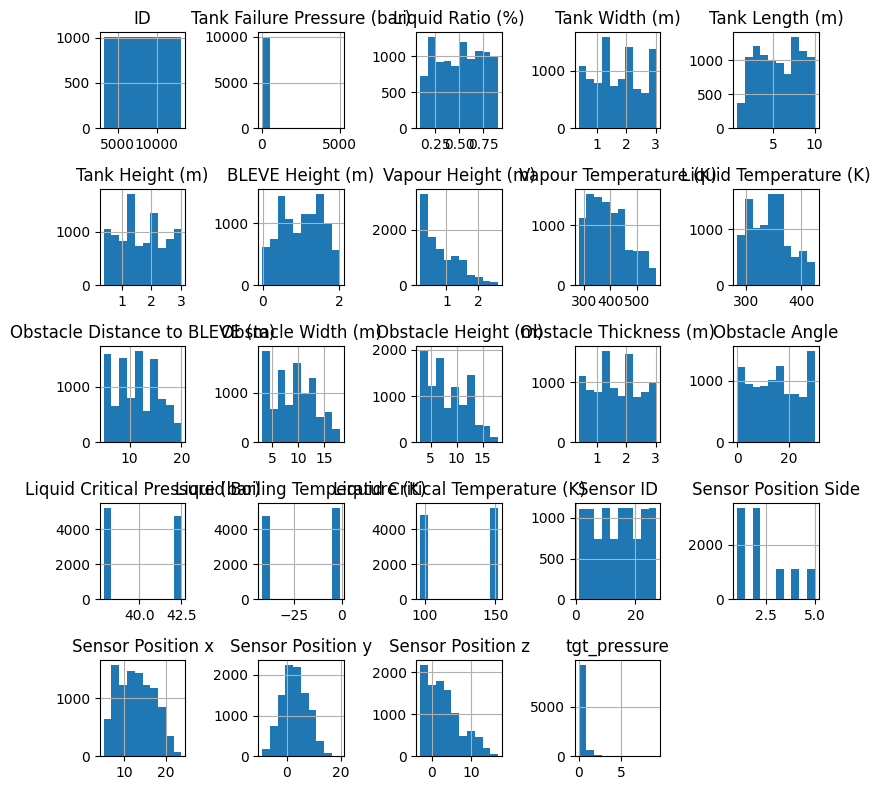

In [7]:
raw_data.hist(figsize = (8,8))
plt.tight_layout()
plt.show()

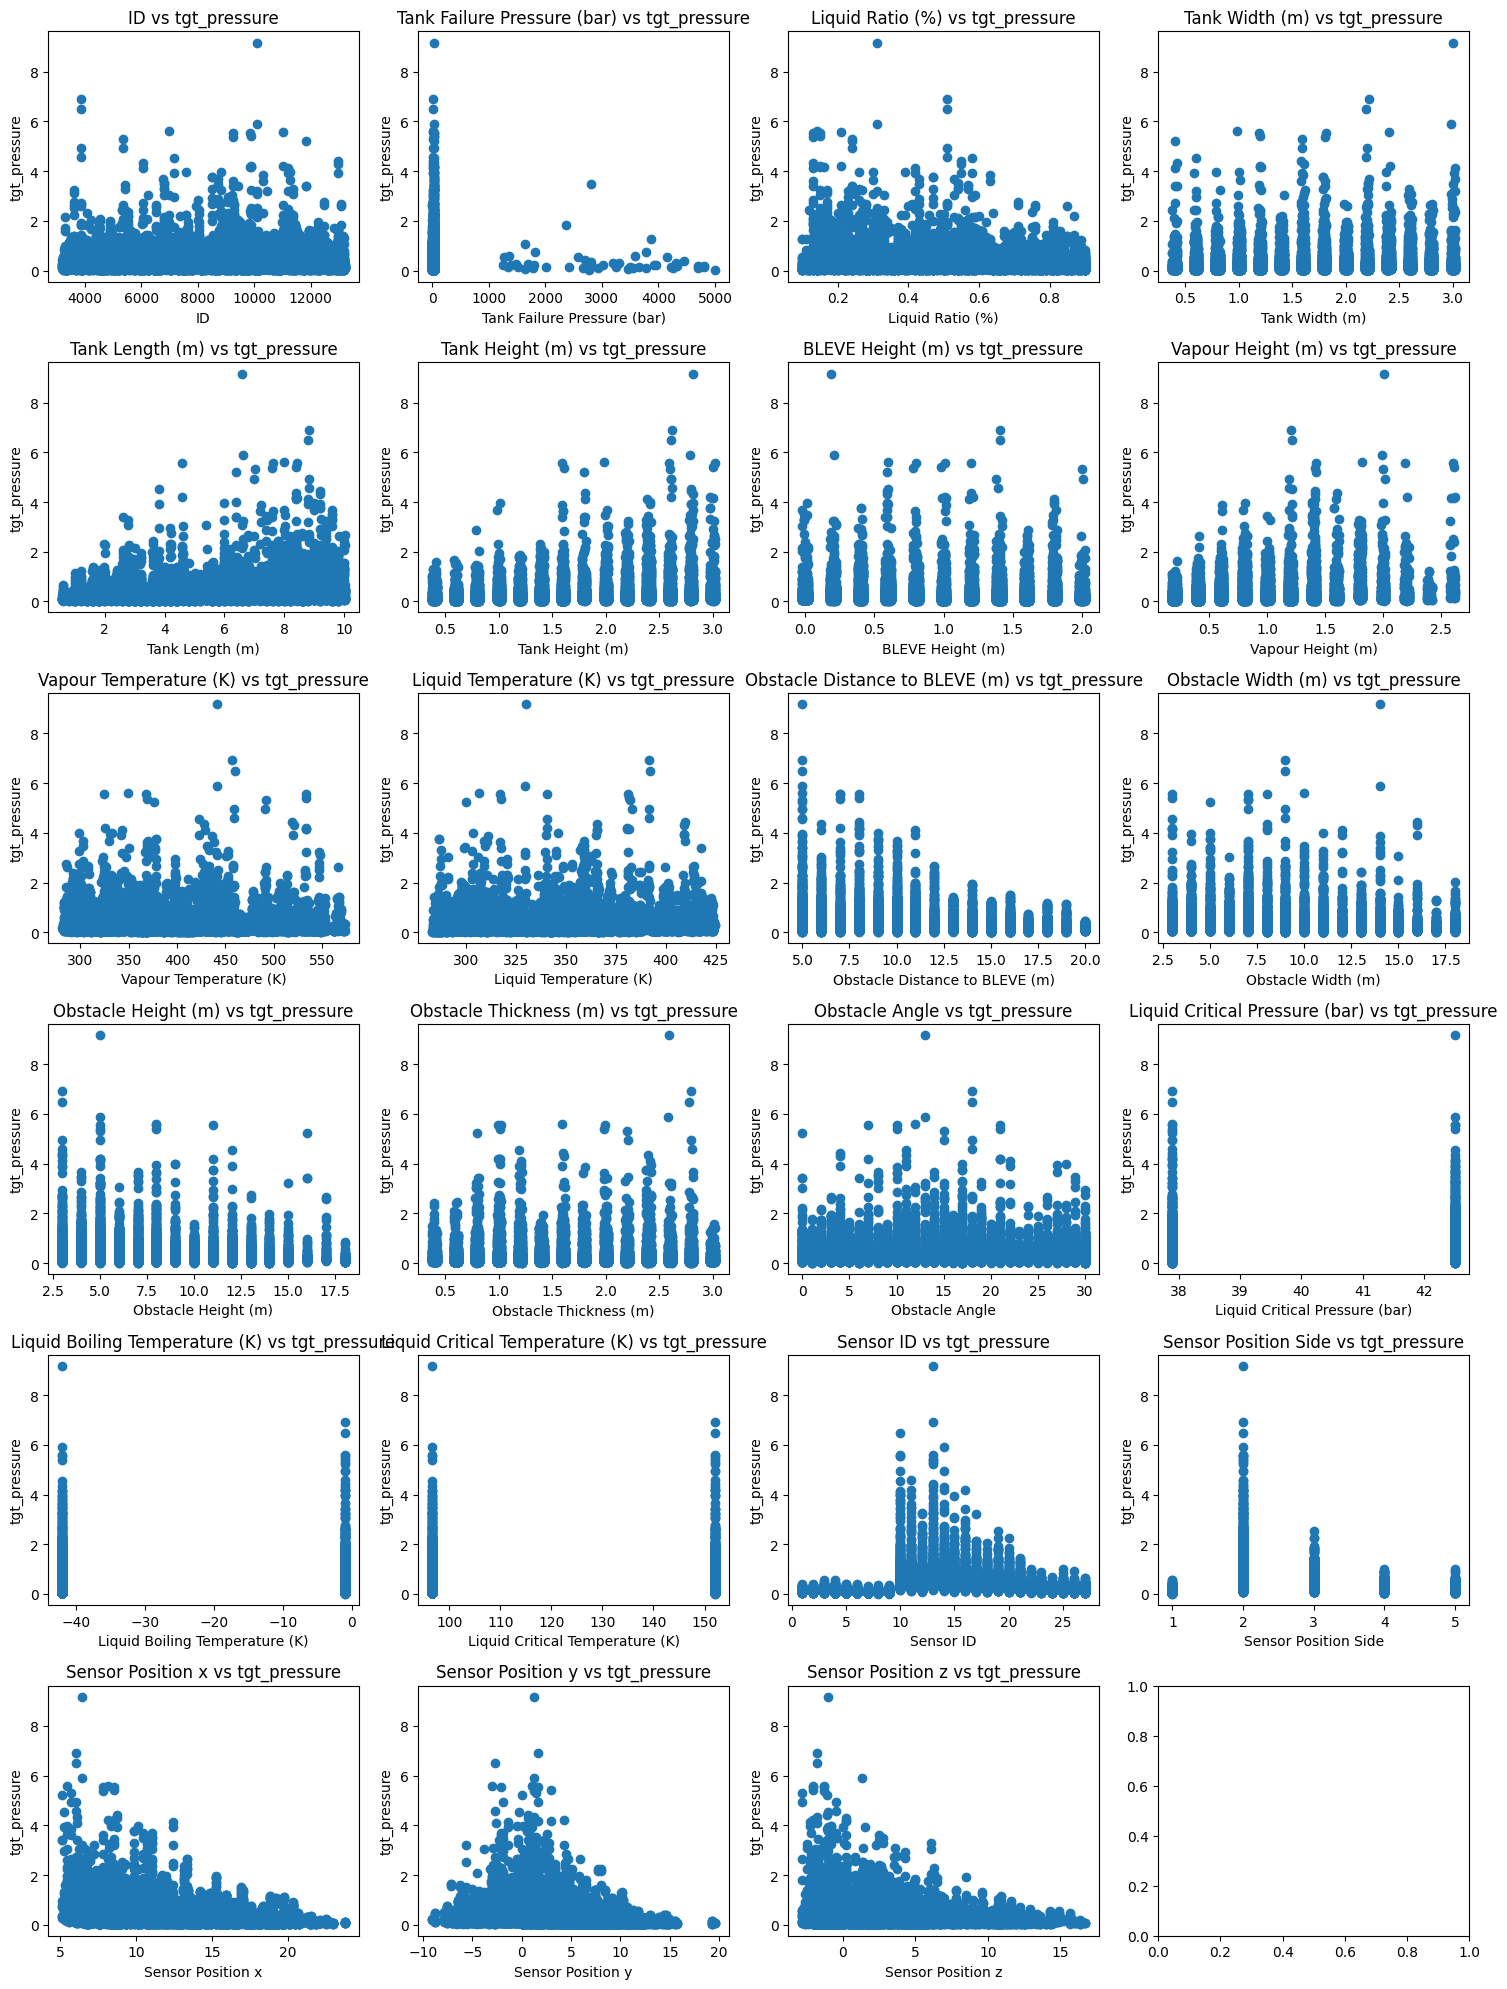

In [8]:
raw_data_num = raw_data.select_dtypes(include=[np.number])

n_cols = 4
n_rows = int(len(raw_data_num.columns) / n_cols) + (len(raw_data_num.columns) % n_cols > 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for i, col_name in enumerate(raw_data_num.columns):
    if col_name != "tgt_pressure":
        ax = axs[i//n_cols, i%n_cols]
        ax.scatter(raw_data_num[col_name], raw_data_num["tgt_pressure"])
        ax.set_title(f"{col_name} vs tgt_pressure")
        ax.set_xlabel(col_name)
        ax.set_ylabel("tgt_pressure")

plt.tight_layout()
plt.show()

In [9]:
raw_data_num.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [10]:
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [11]:
raw_data_num["Volume"] = raw_data_num["Tank Length (m)"] * raw_data_num["Tank Height (m)"]

In [12]:
## TURN OFF NIGHT READER WHEN VIEWING CORRPLOTS
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

# Data Preprocessing

## Missing Values

In [13]:
raw_nans = raw_data[raw_data.isna().any(axis = 1)]
print(f"{len(raw_nans)} points with NaNs out of {len(raw_data)} ({len(raw_nans)/len(raw_data)*100:.3f}%)")

112 points with NaNs out of 10050 (1.114%)


In [14]:
# 1: Removing NaNs
raw_data1 = raw_data.dropna()

## Outliers

In [15]:
outlier_df = raw_data1.drop("ID", axis = 1).select_dtypes(exclude=['object']).copy()

<Axes: >

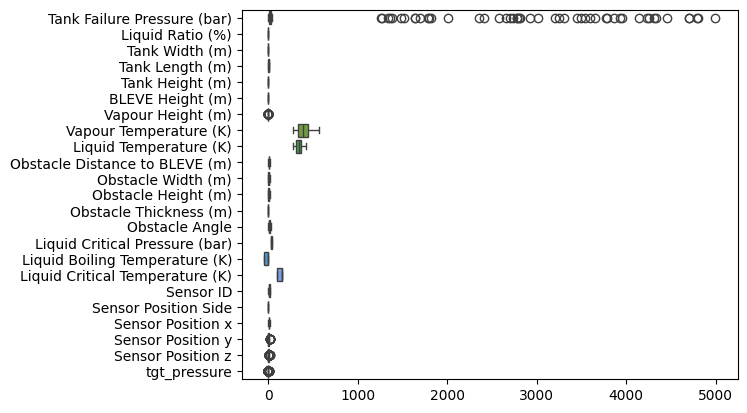

In [16]:
sns.boxplot(outlier_df, orient = "h")

It is apparent that "Tank Failure Pressure" has a large amount of outliers. We'll investigate this further below

In [17]:
outlier_count = len(raw_data1.query("`Tank Failure Pressure (bar)` > 1000"))

In [18]:
outlier_df.sort_values("Tank Failure Pressure (bar)", ascending = False, inplace = True)
display(outlier_df.head())
display(outlier_df.iloc[outlier_count - 3 : outlier_count + 3])

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
4634                  4995.616406              0.73            1.60   
1401                  4807.927645              0.16            0.81   
1198                  4796.894538              0.53            1.19   
9558                  4703.637237              0.55            0.78   
9375                  4702.296095              0.14            2.81   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
4634             8.02             2.39              0.79               0.59   
1401             1.02             2.00              1.21               1.61   
1198             7.58             2.41              1.38               1.18   
9558             5.62             1.99              1.60               0.79   
9375             1.02             1.59              0.82               1.41   

      Vapour Temperature (K)  Liquid Temperature (K)  \
4634                  362.35                  300.93   
1401                  403.73                  330.31   
1198                  407.90                  306.97   
9558                  293.89                  285.08   
9375                  368.05                  332.95   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
4634                            11.0  ...             8.0   
1401                            17.0  ...            28.0   
1198                             8.0  ...            10.0   
9558                            15.0  ...            17.0   
9375                             6.0  ...            15.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
4634                            42.5                           -42.0   
1401                            42.5                           -42.0   
1198                            42.5                           -42.0   
9558                            37.9                            -1.0   
9375                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
4634                             96.7        8.0                   1.0   
1401                             96.7       15.0                   2.0   
1198                             96.7        1.0                   1.0   
9558                            152.0       18.0                   2.0   
9375                             96.7       24.0                   4.0   

      Sensor Position x  Sensor Position y  Sensor Position z  tgt_pressure  
4634              14.65                7.4                5.4      0.042548  
1401              17.35                9.0                5.8      0.130719  
1198               9.85               -0.4               -1.8      0.177109  
9558              15.35                9.9                3.8      0.177894  
9375               8.40                8.4               10.6      0.120019  

[5 rows x 23 columns]

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
1738                  1342.242706              0.20            1.21   
2484                  1270.544969              0.85            2.41   
4647                  1257.523808              0.73            1.61   
5690                    42.180000              0.43            1.80   
5696                    42.160000              0.43            1.80   
5700                    42.120000              0.43            1.82   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
1738             6.22             1.01              0.21               0.78   
2484             5.58             2.38              0.18               0.40   
4647             7.98             2.41              0.81               0.62   
5690             9.80             1.40              0.41               0.82   
5696             9.78             1.42              0.39               0.82   
5700             9.79             1.38              0.39               0.78   

      Vapour Temperature (K)  Liquid Temperature (K)  \
1738                  444.49                  405.76   
2484                  357.61                  378.31   
4647                  362.27                  301.04   
5690                  418.83                  297.97   
5696                  419.09                  298.10   
5700                  419.70                  298.00   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
1738                             5.0  ...            18.0   
2484                            11.0  ...            18.0   
4647                            11.0  ...             8.0   
5690                            10.0  ...            19.0   
5696                            10.0  ...            19.0   
5700                            10.0  ...            19.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
1738                            37.9                            -1.0   
2484                            37.9                            -1.0   
4647                            42.5                           -42.0   
5690                            42.5                           -42.0   
5696                            42.5                           -42.0   
5700                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
1738                            152.0        1.0                   1.0   
2484                            152.0       18.0                   2.0   
4647                             96.7       21.0                   3.0   
5690                             96.7       11.0                   2.0   
5696                             96.7       17.0                   2.0   
5700                             96.7       21.0                   3.0   

      Sensor Position x  Sensor Position y  Sensor Position z  tgt_pressure  
1738               8.65              -0.70               -0.4      0.147148  
2484              12.15               5.90                7.4      0.546492  
4647              13.20              -4.45               11.7      0.236112  
5690              10.85               1.60                2.2      1.965685  
5696              10.85               5.20                2.2      1.428485  
5700              12.30               1.35                5.0      0.877835  

[6 rows x 23 columns]

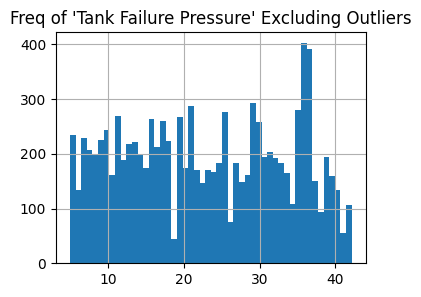



## Smallest 10 values ##


9406    4.92
9422    4.93
9425    4.96
9410    4.97
9417    4.98
9432    5.00
9427    5.00
9421    5.04
5423    5.05
9429    5.06
Name: Tank Failure Pressure (bar), dtype: float64

In [19]:
outlier_df.iloc[outlier_count:]["Tank Failure Pressure (bar)"].hist(bins = 50, figsize = (4,3))
plt.title("Freq of 'Tank Failure Pressure' Excluding Outliers")
plt.show()

print("\n\n## Smallest 10 values ##")
display(outlier_df["Tank Failure Pressure (bar)"].nsmallest(10))

We can see that 1) the outlier values are in the range [1000,5000] and that all the remaining values are roughly between 4 and 40. If we consider for the fact that another popular unit of measurement for pressure, kPa, is 100x the value of bar, these outlier values now make sense and don't appear to be outlier values anymore. Given that these sort of errors are present throughout the data (e.g. use of C instead of K in temperature, mentioned later) and the fact that the rest of the values for these "outlier" data points appear to be reasonable, it appears to be fair to assume that these values are simple recording errors and should be divided by 100, rather than removed.

In [20]:
outlier_df.loc[outlier_df['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

<Axes: >

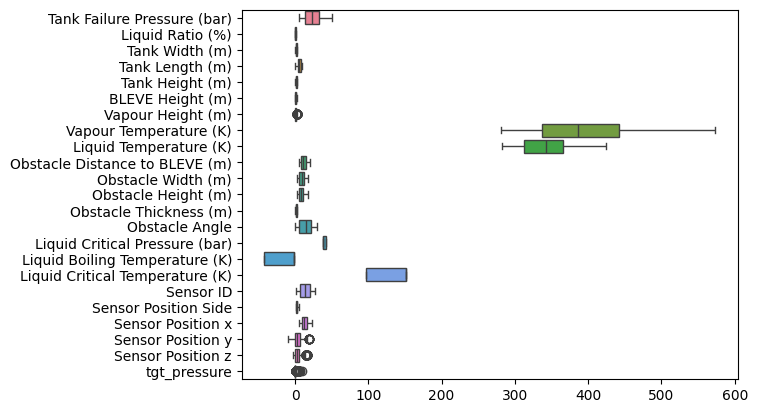

In [21]:
sns.boxplot(outlier_df, orient = "h")

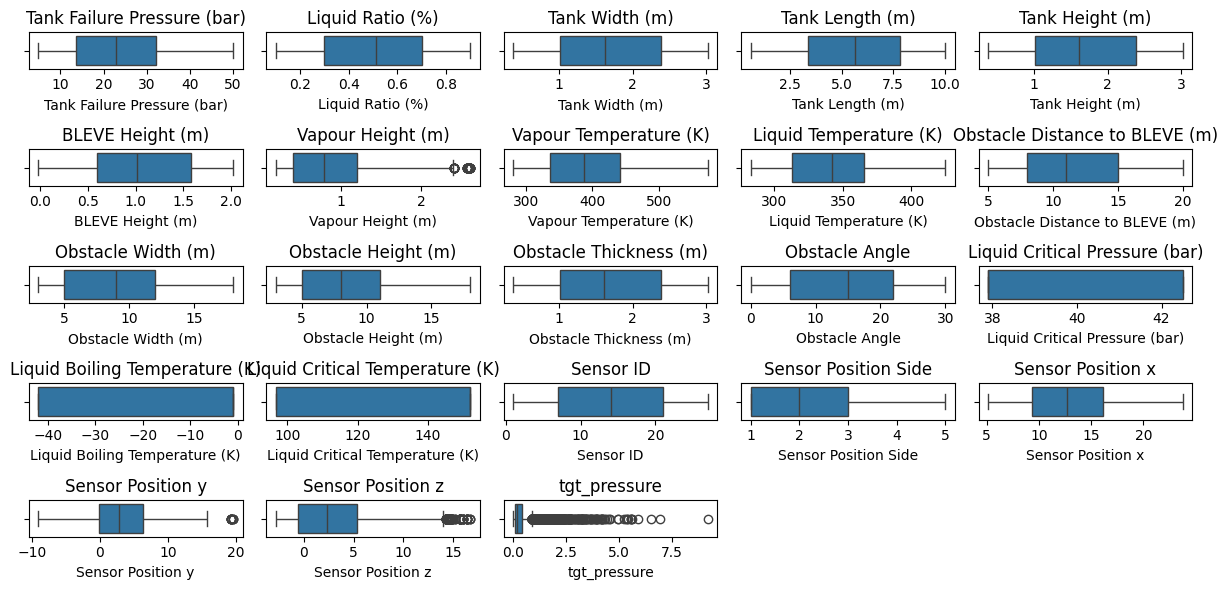

In [22]:
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(12, 6))
axes = axes.flatten()

# Plot each boxplot in a separate subplot
for i, column in enumerate(outlier_df.columns):
    sns.boxplot(x=outlier_df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

for j in range(len(outlier_df.columns), len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

We can see that most columns do not contain outliers in the strict "1.5 * IQR" sense; only "Vapour Height (m)", "Sensor Position y", "Sensor Position z" and "tgt_pressure" do. Below are the histograms for each of these columns.

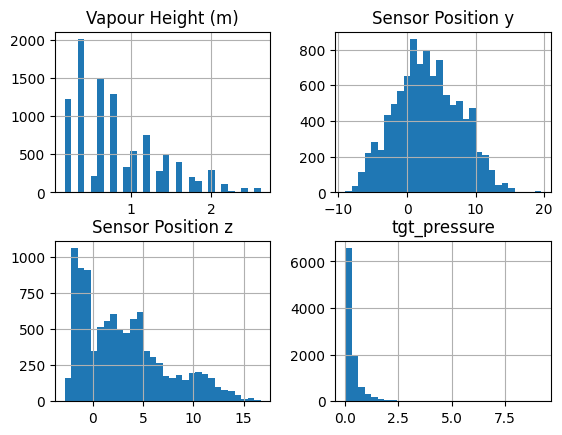

In [23]:
outlier_df[["Vapour Height (m)", "Sensor Position y", "Sensor Position z", "tgt_pressure"]].hist(bins = 30)
plt.show()

In [24]:
outlier_df.query("`Sensor Position y` > 18").sort_index()

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
5443                         8.90              0.37            1.20   
5444                         8.90              0.37            1.22   
5445                         8.85              0.36            1.22   
5452                         8.88              0.36            1.22   
5453                         8.88              0.37            1.21   
5454                         8.82              0.37            1.19   
5460                         8.99              0.37            1.19   
5461                         8.88              0.37            1.20   
5462                         9.05              0.37            1.18   
5463                         8.82              0.37            1.20   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
5443             3.20             2.21              0.41               1.42   
5444             3.20             2.21              0.39               1.39   
5445             3.20             2.19              0.41               1.41   
5452             3.21             2.21              0.40               1.40   
5453             3.19             2.21              0.42               1.41   
5454             3.19             2.22              0.41               1.42   
5460             3.21             2.22              0.42               1.38   
5461             3.18             2.18              0.41               1.39   
5462             3.21             2.20              0.41               1.39   
5463             3.21             2.20              0.39               1.41   

      Vapour Temperature (K)  Liquid Temperature (K)  \
5443                  352.88                  343.07   
5444                  351.56                  343.28   
5445                  352.50                  342.98   
5452                  351.55                  343.11   
5453                  351.88                  342.87   
5454                  350.64                  343.46   
5460                  351.33                  343.17   
5461                  351.03                  342.86   
5462                  351.57                  343.49   
5463                  351.48                  344.13   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
5443                            19.0  ...            30.0   
5444                            19.0  ...            30.0   
5445                            19.0  ...            30.0   
5452                            19.0  ...            30.0   
5453                            19.0  ...            30.0   
5454                            19.0  ...            30.0   
5460                            19.0  ...            30.0   
5461                            19.0  ...            30.0   
5462                            19.0  ...            30.0   
5463                            19.0  ...            30.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
5443                            42.5                           -42.0   
5444                            42.5                           -42.0   
5445                            42.5                           -42.0   
5452                            42.5                           -42.0   
5453                            42.5                           -42.0   
5454                            42.5                           -42.0   
5460                            42.5                           -42.0   
5461                            42.5                           -42.0   
5462                            42.5                           -42.0   
5463                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
5443                             96.7        7.0                   1.0   
5444                             96.7        8.0                   1.0   
5445                             96.7        9.0  

We can see that the first 3 variables distributions appear to be normal. It appears that all the outlier values for "Sensor Position y" come from the same event, so the "outliers" appear to instead be reasonable values that should not be excluded from our data. 

However, the data for tgt_pressure appears to be more prone to outliers (as there is a large gap in the middle and right of the graph). This is looked into further below

<Axes: >

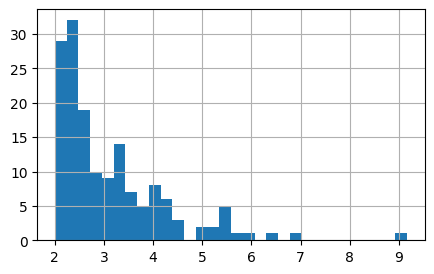

In [25]:
outlier_df.query("`tgt_pressure` > 2")["tgt_pressure"].hist(bins = 30, figsize = (5,3))

In [26]:
outlier_df.sort_values("tgt_pressure", ascending = False).head(10).T

6907        670         667   \
Tank Failure Pressure (bar)       26.150000   25.570000   25.600000   
Liquid Ratio (%)                   0.310000    0.510000    0.510000   
Tank Width (m)                     3.000000    2.220000    2.190000   
Tank Length (m)                    6.580000    8.810000    8.780000   
Tank Height (m)                    2.820000    2.620000    2.610000   
BLEVE Height (m)                   0.190000    1.410000    1.410000   
Vapour Height (m)                  2.010000    1.200000    1.210000   
Vapour Temperature (K)           440.780000  456.360000  459.640000   
Liquid Temperature (K)           329.900000  391.820000  391.920000   
Obstacle Distance to BLEVE (m)     5.000000    5.000000    5.000000   
Obstacle Width (m)                14.000000    9.000000    9.000000   
Obstacle Height (m)                5.000000    3.000000    3.000000   
Obstacle Thickness (m)             2.590000    2.800000    2.780000   
Obstacle Angle                    13.000000   18.000000   18.000000   
Liquid Critical Pressure (bar)    42.500000   37.900000   37.900000   
Liquid Boiling Temperature (K)   -42.000000   -1.000000   -1.000000   
Liquid Critical Temperature (K)   96.700000  152.000000  152.000000   
Sensor ID                         13.000000   13.000000   10.000000   
Sensor Position Side               2.000000    2.000000    2.000000   
Sensor Position x                  6.450000    6.050000    6.050000   
Sensor Position y                  1.200000    1.600000   -2.700000   
Sensor Position z                 -1.000000   -1.800000   -1.800000   
tgt_pressure                       9.170477    6.916218    6.492666   

                                       6908        3775        7822  \
Tank Failure Pressure (bar)       26.270000   15.510000   18.080000   
Liquid Ratio (%)                   0.310000    0.140000    0.210000   
Tank Width (m)                     2.980000    0.980000    2.400000   
Tank Length (m)                    6.610000    7.990000    4.590000   
Tank Height (m)                    2.790000    1.980000    2.590000   
BLEVE Height (m)                   0.210000    0.600000    1.200000   
Vapour Height (m)                  1.990000    1.820000    2.190000   
Vapour Temperature (K)           440.770000  348.900000  323.970000   
Liquid Temperature (K)           329.350000  306.300000  340.390000   
Obstacle Distance to BLEVE (m)     5.000000    5.000000    7.000000   
Obstacle Width (m)                14.000000   10.000000    8.000000   
Obstacle Height (m)                5.000000    8.000000   11.000000   
Obstacle Thickness (m)             2.580000    1.590000    0.990000   
Obstacle Angle                    13.000000   12.000000    7.000000   
Liquid Critical Pressure (bar)    42.500000   37.900000   42.500000   
Liquid Boiling Temperature (K)   -42.000000   -1.000000  -42.000000   
Liquid Critical Temperature (K)   96.700000  152.000000   96.700000   
Sensor ID                         14.000000   13.000000   10.000000   
Sensor Position Side               2.000000    2.000000    2.000000   
Sensor Position x                  6.450000    5.450000    8.150000   
Sensor Position y                  1.200000    1.000000   -3.000000   
Sensor Position z                  1.300000   -1.300000   -2.100000   
tgt_pressure                       5.893072    5.597202    5.571707   

                                       6661        6040        6664  \
Tank Failure Pressure (bar)       26.640000   34.130000   26.710000   
Liquid Ratio (%)                   0.150000    0.130000    0.150000   
Tank Width (m)                     1.190000    1.820000    1.200000   
Tank Length (m)                    8.420000    7.610000    8.400000   
Tank Height (m)                    3.020000    1.590000    3.000000   
BLEVE Height (m)                   1.010000    0.800000    0.980000   
Vapour Height (m)                  2.600000    1.420000    2.610000   
Vapour Temperature (K)           532.950000  368.170000  532.

This data doesn't appear to be too unreasonable - they instead appear to be natural variations in the data, notably when the "tank volume" is large - arguably aside from the value of 9.

In [27]:
outlier_df.sort_index(inplace = True)
outlier_df.loc[6904:6910][["Sensor ID", "tgt_pressure"]].T

6904       6905       6906       6907       6908      6909  \
Sensor ID     10.000000  11.000000  12.000000  13.000000  14.000000  15.00000   
tgt_pressure   3.221491   2.524463   1.529262   9.170477   5.893072   3.08953   

                   6910  
Sensor ID     16.000000  
tgt_pressure   2.263237

Whilst the value of 9.17 from sensor 13 does appear to be quite large, we must consider that it's 1) in the front and middle of the obstacle, and 2) the surrounding 3 sensors (10, 14 and 16) also have abnormally large tgt_pressure values (of 3.22, 5.89 and 2.26 respectively). There is thus not considerable doubt that this value is erroneous, or influenced by measurement error, errors when entering data, poor sampling etc. and so it will not be removed.

In [28]:
# Unused
def remove_outliers_IQR(df, cols, quantile = 0.25, mult = 1.5):
    for col in cols:
        Q1 = df[col].quantile(quantile)
        Q3 = df[col].quantile(1-quantile)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - mult * IQR
        upper_bound = Q3 + mult * IQR

        n_prior = len(df)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        n_after = len(df)
        
        print(f"##### {col} #####\nBounds: {lower_bound:.5f} - {upper_bound:.5f} (IQR: {IQR:.5f})\nn(removed): {n_prior - n_after}\n")
        
    return df

# raw_data2 = remove_outliers_IQR(raw_data1, ["Tank Failure Pressure (bar)"])

In [29]:
raw_data2 = raw_data1.sort_values("ID").reset_index(drop = True).copy()
raw_data2.loc[raw_data2['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

## Data Encoding

In [30]:
# 3.1: Encoding Status Column
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled', 'Subcool', 'subcooled', 'superheated',
       'Subcoled', 'Superheat', 'Saperheated'], dtype=object)

In [31]:
raw_data2.loc[raw_data2['Status'].str.contains('sub|cool', case=False), 'Status'] = 'Subcooled'
raw_data2.loc[raw_data2['Status'].str.contains('super|heat', case=False), 'Status'] = 'Superheated'

In [32]:
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [33]:
temp = pd.concat([raw_data2, pd.get_dummies(raw_data2['Status'], drop_first=True).astype(int)], axis=1)
raw_data3 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

temp = pd.concat([raw_test_data, pd.get_dummies(raw_test_data['Status'], drop_first=True).astype(int)], axis=1)
raw_test_data2 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

In [34]:
raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                             37.9                            -1.0   
63                            42.5                           -42.0   

    Liquid Critical Temperature (K)  
0                             152.0  
63                             96.7

In [35]:
dummies = pd.get_dummies(raw_data3['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [36]:
dummies = pd.get_dummies(raw_test_data2['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [177]:
# Creating a lookup for the properties of each substance (there are only 2 distinct substance present; we will denote them 0 and 1). This table will allow us to view their properties later
substance_properties = raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()
substance_properties = substance_properties.rename(index = {substance_properties.index[0]: "n-butane", substance_properties.index[1]: "propane"})

In [178]:
substance_properties

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
n-butane                            37.9                            -1.0   
propane                             42.5                           -42.0   

          Liquid Critical Temperature (K)  
n-butane                            152.0  
propane                              96.7

## 'Events'

Before we continue, we should establish that the data is grouped into indiviudal explosions. 

Looking at the below example, we can clearly see that the first 4 below belong to the same explosion due to the similarity in values (especially the substance properties), they are just measurements from different sensors - and likewise for the last 4 measurements.

In [38]:
raw_data4 = raw_data3.copy()

In [39]:
raw_data4.iloc[33:41]

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
33  3236.0                        30.64              0.81            1.59   
34  3237.0                        30.59              0.81            1.59   
35  3238.0                        30.46              0.80            1.60   
36  3239.0                        30.59              0.80            1.59   
37  3240.0                        24.11              0.66            2.78   
38  3241.0                        24.05              0.66            2.81   
39  3242.0                        24.14              0.66            2.80   
40  3243.0                        23.90              0.65            2.81   

    Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
33             4.41             0.80              1.19               0.20   
34             4.39             0.78              1.20               0.18   
35             4.42             0.79              1.20               0.21   
36             4.42             0.79              1.18               0.19   
37             8.38             0.78              1.60               0.19   
38             8.38             0.78              1.58               0.21   
39             8.41             0.81              1.61               0.18   
40             8.40             0.81              1.62               0.20   

    Vapour Temperature (K)  Liquid Temperature (K)  ...  Sensor ID  \
33                  363.59                  407.41  ...       24.0   
34                  363.66                  407.68  ...       25.0   
35                  363.64                  407.02  ...       26.0   
36                  364.08                  407.56  ...       27.0   
37                  461.49                  363.16  ...        1.0   
38                  461.70                  363.94  ...        2.0   
39                  462.31                  363.63  ...        3.0   
40                  461.80                  363.41  ...        4.0   

    Sensor Position Side  Sensor Position x  Sensor Position y  \
33                   4.0              10.30               4.40   
34                   5.0              10.30               4.65   
35                   5.0              10.30               4.65   
36                   5.0              10.30               4.65   
37                   1.0              20.05               1.40   
38                   1.0              20.05               1.40   
39                   1.0              20.05               1.40   
40                   1.0              20.05               4.20   

    Sensor Position z  tgt_pressure  Superheated_status  \
33               12.8      0.102690                   0   
34               -1.1      0.149726                   0   
35                5.7      0.100412                   0   
36               12.5      0.103633                   0   
37               -1.5      0.076563                   0   
38                1.3      0.077139                   0   
39                4.1      0.105216                   0   
40               -1.5      0.055952                   0   

    Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
33                               0                               0   
34                               0                               0   
35                               0                               0   
36                               0                               0   
37                               0                               0   
38                               0                               0   
39                               0                               0   
40                               0                               0   

    Liquid Critical Temperature (K)  
33                                0  
34                                0  
35                                0  
36                                0  
37                                0  
38 

It however makes no sense that values which should be constant (e.g. "tank width") are different between measurements. This would be artificially induced noise that will be removed for the sake of consistency. This noise also leads to nonsensical values - for example, where the "Vapour Height" (the height of the vapour in the tank) exceeds the "Tank Height" as can be seen below.

In [40]:
raw_data4.query("`Tank Height (m)` < `Vapour Height (m)`")[["Vapour Height (m)","Tank Height (m)"]].head()

Vapour Height (m)  Tank Height (m)
1353               0.82             0.80
1355               0.82             0.81
1361               0.81             0.78
1364               0.81             0.79
1365               0.82             0.79

To deal with this, we'll separate the data points into their separate events by adding an "event_num". We'll then set the value of appropriate parameters to the median of all the different values for that event - we'll avoid using mean as this is prone to outliers.

In [41]:
event_num = 1
prev_id = raw_data4.loc[0, "Sensor ID"]

event_nums = []

for index, row in raw_data4.iterrows():
    curr_id = row["Sensor ID"]
    if curr_id < prev_id:
        event_num += 1 
    
    event_nums.append(event_num)
    prev_id = curr_id

raw_data4.loc[:,"event_num"] = event_nums

We will now remove the noise from the columns which should be the same across events

In [42]:
raw_data4.T

0            1            2     \
ID                               3203.000000  3204.000000  3205.000000   
Tank Failure Pressure (bar)         7.320000     7.180000     7.320000   
Liquid Ratio (%)                    0.420000     0.420000     0.410000   
Tank Width (m)                      2.420000     2.390000     2.390000   
Tank Length (m)                     5.390000     5.390000     5.380000   
Tank Height (m)                     1.000000     1.010000     1.000000   
BLEVE Height (m)                    1.790000     1.810000     1.780000   
Vapour Height (m)                   0.600000     0.590000     0.620000   
Vapour Temperature (K)            524.610000   522.800000   523.000000   
Liquid Temperature (K)            354.490000   354.310000   354.590000   
Obstacle Distance to BLEVE (m)     11.000000    11.000000    11.000000   
Obstacle Width (m)                 11.000000    11.000000    11.000000   
Obstacle Height (m)                13.000000    13.000000    13.000000   
Obstacle Thickness (m)              0.620000     0.620000     0.600000   
Obstacle Angle                     13.000000    13.000000    13.000000   
Sensor ID                          18.000000    19.000000    20.000000   
Sensor Position Side                2.000000     3.000000     3.000000   
Sensor Position x                  12.150000    12.500000    12.500000   
Sensor Position y                   7.900000    -2.950000    -2.950000   
Sensor Position z                  10.700000    -1.900000     4.400000   
tgt_pressure                        0.199929     0.435681     0.264031   
Superheated_status                  1.000000     1.000000     1.000000   
Liquid Critical Pressure (bar)      0.000000     0.000000     0.000000   
Liquid Boiling Temperature (K)      0.000000     0.000000     0.000000   
Liquid Critical Temperature (K)     0.000000     0.000000     0.000000   
event_num                           1.000000     1.000000     1.000000   

                                        3            4            5     \
ID                               3206.000000  3207.000000  3208.000000   
Tank Failure Pressure (bar)         7.260000     7.320000     7.220000   
Liquid Ratio (%)                    0.420000     0.420000     0.410000   
Tank Width (m)                      2.400000     2.400000     2.390000   
Tank Length (m)                     5.410000     5.410000     5.400000   
Tank Height (m)                     1.000000     1.020000     0.990000   
BLEVE Height (m)                    1.810000     1.790000     1.810000   
Vapour Height (m)                   0.610000     0.620000     0.590000   
Vapour Temperature (K)            522.350000   522.980000   523.300000   
Liquid Temperature (K)            354.370000   354.330000   354.220000   
Obstacle Distance to BLEVE (m)     11.000000    11.000000    11.000000   
Obstacle Width (m)                 11.000000    11.000000    11.000000   
Obstacle Height (m)                13.000000    13.000000    13.000000   
Obstacle Thickness (m)              0.600000     0.620000     0.590000   
Obstacle Angle                     13.000000    13.000000    13.000000   
Sensor ID                          21.000000    22.000000    23.000000   
Sensor Position Side                3.000000     4.000000     4.000000   
Sensor Position x                  12.500000    12.500000    12.500000   
Sensor Position y                  -2.950000    -2.700000     2.600000   
Sensor Position z                  10.700000    11.000000    11.000000   
tgt_pressure                        0.270576     0.204675     0.118211   
Superheated_status                  1.000000     1.000000     1.000000   
Liquid Critical Pressure (bar)      0.000000     0.000000     0.000000   
Liquid Boiling Temperature (K)      0.000000     0.000000     0.000000   
Liquid Critical Temperature (K)     0.000000     0.000000     0.000000   
event_num                           1.000000     1.000000     1.000000   

                                        6 

In [43]:
changing_cols = ['ID', 
                 'Sensor ID', 
                 'Sensor Position Side', 
                 'Sensor Position x', 
                 'Sensor Position y', 
                 'Sensor Position z', 
                 'tgt_pressure', 
                 'event_num']

In [44]:
constant_cols = raw_data4.columns[~raw_data4.columns.isin(changing_cols)]
event_medians = raw_data4.groupby('event_num')[constant_cols].median().reset_index()

# Merge aggregated data back to the original DataFrame based on 'event_num'
raw_data5 = pd.merge(raw_data4[changing_cols],
                       event_medians,
                       on='event_num',
                     )

raw_data5 = raw_data5[raw_data4.columns]

Whilst noise might have been added to a few columns in the dataframe, this is not present in the liquid's properties and thus the value for this should be constant for an event - if these values change, it implies that there is a different substance being used, which implies greater issues with the data or our processing of it. We will check for this below.

In [45]:
check_cols = [
    "Liquid Critical Pressure (bar)",
    "Liquid Boiling Temperature (K)",
    "Liquid Critical Temperature (K)"
]

inconsistent_trials = []
for event_num, group_data in raw_data4.groupby('event_num'):
    group_values = group_data[check_cols].values
    
    if not all(all(val == 1 for val in row) or all(val == 0 for val in row) for row in group_values):
        inconsistent_trials.append(event_num)

print(f"Event_num values with inconsistent values: {inconsistent_trials}")

Event_num values with inconsistent values: []


Thankfully, we can see that each event has the same substance for each of the 27 odd data points, thus there is no issue we need to address.

## Incorrect Values

### Negative and 0 Values

In [46]:
raw_data5

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0      3203.0                        7.320              0.42           2.395   
1      3204.0                        7.320              0.42           2.395   
2      3205.0                        7.320              0.42           2.395   
3      3206.0                        7.320              0.42           2.395   
4      3207.0                        7.320              0.42           2.395   
...       ...                          ...               ...             ...   
9933  13199.0                       18.285              0.57           2.000   
9934  13200.0                       18.285              0.57           2.000   
9935  13201.0                       18.285              0.57           2.000   
9936  13201.0                       18.285              0.57           2.000   
9937  13202.0                       18.285              0.57           2.000   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                5.40              1.0             1.790              0.605   
1                5.40              1.0             1.790              0.605   
2                5.40              1.0             1.790              0.605   
3                5.40              1.0             1.790              0.605   
4                5.40              1.0             1.790              0.605   
...               ...              ...               ...                ...   
9933             7.19              1.0             0.205              0.400   
9934             7.19              1.0             0.205              0.400   
9935             7.19              1.0             0.205              0.400   
9936             7.19              1.0             0.205              0.400   
9937             7.19              1.0             0.205              0.400   

      Vapour Temperature (K)  Liquid Temperature (K)  ...  \
0                    522.915                  354.43  ...   
1                    522.915                  354.43  ...   
2                    522.915                  354.43  ...   
3                    522.915                  354.43  ...   
4                    522.915                  354.43  ...   
...                      ...                     ...  ...   
9933                 540.390                  319.20  ...   
9934                 540.390                  319.20  ...   
9935                 540.390                  319.20  ...   
9936                 540.390                  319.20  ...   
9937                 540.390                  319.20  ...   

      Sensor Position Side  Sensor Position x  Sensor Position y  \
0                      2.0              12.15               7.90   
1                      3.0              12.50              -2.95   
2                      3.0              12.50              -2.95   
3                      3.0              12.50              -2.95   
4                      4.0              12.50              -2.70   
...                    ...                ...                ...   
9933                   4.0              16.10               6.60   
9934                   5.0              16.10               6.85   
9935                   5.0              16.10               6.85   
9936                   5.0              16.10               6.85   
9937                   5.0              16.10               6.85   

      Sensor Position z  tgt_pressure  Superheated_status  \
0                  10.7      0.199929                 1.0   
1                  -1.9      0.435681                 1.0   
2                   4.4      0.264031                 1.0   
3                  10.7      0.270576                 1.0   
4                  11.0      0.204675                 1.0   
...                 ...           ...                 ...   
9933               14.7      0.116293                 0.0   
9934               -0.2      0.112795                 0.0   
99

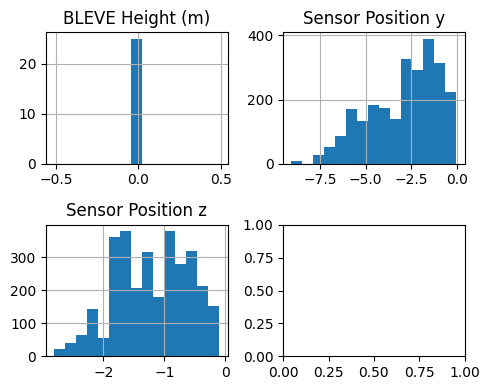

In [47]:
n_cols = 2
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*2.5, n_rows*2))

i = 0
for var in raw_data5.columns:
    temp = raw_data5[raw_data5[var] < 0]
    
    if not temp.empty:
        ax = axs[i//n_cols, i%n_cols]
        temp[var].hist(bins=15, ax = ax)
        ax.set_title(f'{var}')
        i += 1

plt.tight_layout()

In [48]:
raw_data5["Liquid Boiling Temperature (K)"].unique()

array([0., 1.])

Note that the "BLEVE Height (m)" is "the distance of the tank to the ground (in meter)" [sic]. After confirming with the source of the data that this can not be negative, we must remove it from our data.

Additionally, the "Liquid Boiling Temperature" is in Kelvin, however, all values in our set are negative (which is impossible as Kelvin is an absolute scale). Whilst this appears to be invalid, we'll discuss in 2.6.6 how this is actually just a mistake in the recording of data

In [49]:
raw_data5["BLEVE Height (m)"] = raw_data5["BLEVE Height (m)"].clip(lower = 0)

### Others

The height of vapour in the tank should not exceed the height of the tank itself

In [50]:
raw_data5.loc[raw_data5["Tank Height (m)"] < raw_data5["Vapour Height (m)"]].head(10)[["Tank Height (m)","Vapour Height (m)"]]

Tank Height (m)  Vapour Height (m)
3413             0.59                0.6
3414             0.59                0.6
3415             0.59                0.6
3416             0.59                0.6
3417             0.59                0.6
3418             0.59                0.6
3419             0.59                0.6
3420             0.59                0.6
3421             0.59                0.6
3422             0.59                0.6

In [51]:
raw_data6 = raw_data5.query("`Tank Height (m)` >= `Vapour Height (m)`")

## Duplicates

In [52]:
# 4: Removing Duplicates
display(raw_data6[raw_data6.duplicated(keep=False)].sort_values(by=raw_data5.columns.tolist()))

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
186    3392.0                       21.090              0.67           1.600   
187    3392.0                       21.090              0.67           1.600   
461    3669.0                       34.910              0.69           2.195   
462    3669.0                       34.910              0.69           2.195   
760    3972.0                       36.875              0.58           2.590   
...       ...                          ...               ...             ...   
9213  12477.0                       31.275              0.28           3.000   
9493  12758.0                       16.390              0.55           0.810   
9494  12758.0                       16.390              0.55           0.810   
9935  13201.0                       18.285              0.57           2.000   
9936  13201.0                       18.285              0.57           2.000   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
186              4.20             1.19             1.000               0.40   
187              4.20             1.19             1.000               0.40   
461              4.20             0.60             1.800               0.20   
462              4.20             0.60             1.800               0.20   
760              3.40             2.60             1.205               1.01   
...               ...              ...               ...                ...   
9213             2.61             2.80             0.800               2.00   
9493             5.61             2.00             1.600               0.80   
9494             5.61             2.00             1.600               0.80   
9935             7.19             1.00             0.205               0.40   
9936             7.19             1.00             0.205               0.40   

      Vapour Temperature (K)  Liquid Temperature (K)  ...  \
186                  411.370                 286.875  ...   
187                  411.370                 286.875  ...   
461                  314.120                 347.740  ...   
462                  314.120                 347.740  ...   
760                  331.050                 286.950  ...   
...                      ...                     ...  ...   
9213                 568.335                 315.290  ...   
9493                 293.410                 284.460  ...   
9494                 293.410                 284.460  ...   
9935                 540.390                 319.200  ...   
9936                 540.390                 319.200  ...   

      Sensor Position Side  Sensor Position x  Sensor Position y  \
186                    2.0              15.75              12.20   
187                    2.0              15.75              12.20   
461                    5.0              16.80               2.65   
462                    5.0              16.80               2.65   
760                    1.0              19.95               8.20   
...                    ...                ...                ...   
9213                   1.0              16.35               3.80   
9493                   2.0              15.35               4.60   
9494                   2.0              15.35               4.60   
9935                   5.0              16.10               6.85   
9936                   5.0              16.10               6.85   

      Sensor Position z  tgt_pressure  Superheated_status  \
186                13.6      0.105344                 0.0   
187                13.6      0.105344                 0.0   
461                -1.7      0.131426                 0.0   
462                -1.7      0.131426                 0.0   
760                -1.5      0.083324                 0.0   
...                 ...           ...                 ...   
9213               -1.6      0.142715                 0.0   
9493                3.8      0.294822                 0.0   
94

In [53]:
raw_data7 = raw_data6.drop_duplicates()
print(f"Data dropped: {len(raw_data6) - len(raw_data7)}")

Data dropped: 48


In [54]:
len(raw_data7)

9811

## Major Edits

We will split the data into train, validation and test sets before analysing the data (so we can test our hypotheses locally before submitting them for assessment). However, before we do this, we'll do perform any changes that apply to all datasets here (so we don't have to add them to each dataset separately). This mainly includes renaming the columns to something more friendly for analysis (i.e. snake_case), as well as adding features that we'll explore later.

### Variable Renaming

In [55]:
renamed_cols = [
    "ID",
    "failure_pressure",
    "liquid_pct",
    "tank_w",
    "tank_l",
    "tank_h",
    "BLEVE_h",
    "vapour_height",
    "vapour_temp",
    "liquid_temp",
    "obstacle_dist",
    "obstacle_w",
    "obstacle_h",
    "obstacle_thk",
    "obstacle_angle",
    "sensor_id",
    "sensor_side",
    "sensor_x",
    "sensor_y",
    "sensor_z",
    "tgt_pressure",
    "superheated_status",
    "lqd_crit_pressure",
    "lqd_boil_temp",
    "lqd_crit_temp",
    "event_num",
    "tank_volume",
    "net_sensor_dist"
]

In [289]:
dict_names = dict(zip(raw_data7.columns, renamed_cols))

raw_data8 = raw_data7.rename(columns = dict_names)

In [290]:
raw_test_data3 = raw_test_data2.rename(columns = dict_names)

### Feature Addition

Immediately we can see that many of our variables relate to each other
* E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.
* Also, we have the location of sensors. This is quite important, but we can group sensors by "front", "back" and "side" (rather than looking at them individually)
* Furthermore, we can try convert the sensor's position into a distance metric

In [291]:
tank_axis = ["tank_w", "tank_h", "tank_l"]
raw_data8["tank_volume"] = raw_data8[tank_axis].prod(axis = 1)
# raw_data8.drop(columns = tank_axis, inplace = True)

raw_data8["sensor_location"] = raw_data8["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3}) # changes 4 and 5 (both sides) to 3 (1 = back, 2 = front, 3 = sides)

sensor_vars = ["sensor_x", "sensor_y", "net_z"]
raw_data8["net_z"] = raw_data8["sensor_z"] - raw_data8["BLEVE_h"]
raw_data8["net_sensor_dist"] = np.linalg.norm(raw_data8[sensor_vars], axis=1)
sensor_vars.append("sensor_z")
raw_data8.drop(columns = sensor_vars, inplace = True)

lqd_properties = ["lqd_crit_pressure", "lqd_boil_temp", "lqd_crit_temp"]
raw_data8["substance"] = raw_data8[lqd_properties].prod(axis = 1)
raw_data8.drop(columns = lqd_properties, inplace = True)

# raw_data8["vapour_volume"] = 

In [292]:
raw_test_data3["tank_volume"] = raw_test_data3[tank_axis].prod(axis = 1)
# raw_test_data3.drop(columns = tank_axis, inplace = True)

raw_test_data3["sensor_location"] = raw_test_data3["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3})
raw_test_data3["net_z"] = raw_test_data3["sensor_z"] - raw_test_data3["BLEVE_h"]
raw_test_data3["net_sensor_dist"] = np.linalg.norm(raw_test_data3[sensor_vars], axis=1)
raw_test_data3.drop(columns = sensor_vars, inplace = True)

raw_test_data3["substance"] = raw_test_data3[lqd_properties].prod(axis = 1)
raw_test_data3.drop(columns = lqd_properties, inplace = True)

In [293]:
processed_data = raw_data8.copy()
processed_test_data = raw_test_data3.copy()

## Splitting Data

In [69]:
# # Train, Validation and Test Splits
# val_train_ratio = 0.7
# val_val_ratio = 0.15

# n_events = max(raw_data8["event_num"])
# val_train_qty = int(val_train_ratio * n_events)
# val_val_qty = int(val_val_ratio * n_events) + val_train_qty

# train_split = raw_data8[raw_data8["event_num"]<val_train_qty]
# validation_split = raw_data8[(raw_data8["event_num"]>=val_train_qty) & (raw_data8["event_num"]<val_val_qty)]
# test_split = raw_data8[raw_data8["event_num"]>=val_val_qty]

In [70]:
n_events = max(raw_data8["event_num"])
train_cutoff = int(0.8 * n_events)
train_split = raw_data8[raw_data8["event_num"]<train_cutoff]
validation_split = raw_data8[raw_data8["event_num"]>=train_cutoff]

In [72]:
ft_data = train_split.copy()

In [71]:
def mape_calc(y_tgt, y_pred):
        return np.mean(np.abs(1 - y_pred / y_tgt))

## Feature Selection

Immediately based off priors, we can see that many of our variables relate to each other. E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.

### Exploration

In [ ]:
plot_tgt_var(ft_data)

In [ ]:
ft_data.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [ ]:
ft_data.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [ ]:
sample = ft_data.loc[10:36]

In [ ]:
sample

In [ ]:
plot_tgt_var(sample)

Looking into distinguishing by sensor_side (instead of individual sensors)

In [ ]:
raw_data2[["Sensor Position Side", "Sensor ID"]].drop_duplicates().sort_values(by = "Sensor ID")

In [ ]:
# We can group IDs by Position Side as such:
# 1: 1-9
# 2: 10-18
# 3: 19-21
# 4: 22-24
# 5: 25-27

# This was done above in 2.5.1 "sensor_location" (using 1 = back, 2 = front, 3 = sides)

In [ ]:
grpd_sensor_loc = ft_data.groupby("sensor_location")
grpd_sensor_loc_vld = validation_split.groupby("sensor_location")

### Net Sensor Distance

In [ ]:
# Plotting Variables vs tgt_pressure for Each Sensor
def plot_sensor_data(grpd_data, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    n_cols = min(len(vars), n_cols)
    n_rows = 27
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for sensor_id, df in grpd_data:
        for col_name in vars:
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{i//n_cols+1}: {col_name}")
            i += 1
        
    plt.tight_layout()
    plt.show()

In [ ]:
grpd = ft_data.groupby("sensor_id")

# plot_sensor_data(grpd, ["sensor_x", "sensor_y", "sensor_z", "net_sensor_dist"])

In [ ]:
n_cols = 3
n_rows = 9
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))

i = 0
for sensor_id, df in grpd:
    ax = axs[i//n_cols, i%n_cols]
    ax.scatter(df["obstacle_dist"], df["net_sensor_dist"])
    ax.set_title(f"{i+1}: sens_dist vs obs_dist")
    i += 1
    
plt.tight_layout()
plt.show()

In [ ]:
y_intercepts = []

for sensor_id, df in grpd:
    X = df[["obstacle_dist"]]
    y = df["net_sensor_dist"]
    model = LinearRegression()
    model.fit(X, y)

    # Get y-intercept
    y_intercept = model.intercept_
    y_intercepts.append(y_intercept)

# Plot y-intercepts on a bar graph
plt.figure(figsize=(6, 3))
plt.bar(range(1, len(y_intercepts) + 1), y_intercepts)
plt.show()

In [ ]:
ft_data.corr()[["tgt_pressure","net_sensor_dist","obstacle_dist"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [ ]:
def reg_stats(df, vars):
    r_sq_result = {}
    
    for predictor in vars:
        X = df[[predictor]]
        y = df["tgt_pressure"]
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        coefficients = model.coef_  # Get the coefficients
        r_sq_result[predictor] = {"R-squared": r_squared, "Coefficients": coefficients}
    
    
    for key, val in r_sq_result.items():
        print(f"### {key} ###\nCoeff = {val['Coefficients'][0]:.4f}\nR^2 = {val['R-squared']:.6f}\n")

In [ ]:
X = ft_data[["net_sensor_dist"]]
y = ft_data["tgt_pressure"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
coefficients = model.coef_  # Get the coefficients
display(pd.DataFrame({"R-squared": r_squared, "Coefficients": coefficients}))

In [ ]:
reg_stats(ft_data, ["net_sensor_dist", "obstacle_dist"])

Conclusion: it appears that the net_sensor_dist and obstacle_distance_to_BLEVE are very similar in nature, and without more information regarding the nature of the experiment, it is hard to pinpoint where exactly this difference comes from.net_sensor_dist has a stronger correlation with tgt_pressure than the obstacle_distance, we will use that instead.

### Functions

In [ ]:
def out_of_sample_test(model, data, print_output = True):
    y2 = data["tgt_pressure"]
    X2 = data.drop(columns=["tgt_pressure"])
    y2_pred = model.predict(X2)
    
    r2_2 = r2_score(y2, y2_pred)
    mape2 = mape_calc(y2, y2_pred)

    print(f"R^2: {r2_2:.4f}, MAPE: {mape2:.4f}")
    if print_output == False:
        return r2_2, mape2

In [ ]:
def forward_selected_r2(data, response, max_features=5, select_features = 5, criterion='aic', k = False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
                r_squared = model.rsquared
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
                r_squared = model.rsquared
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            scores_with_candidates.append((score, r_squared, candidate))
        scores_with_candidates.sort()
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, R^2 = {curr_r2:.4f}):")
        for i, (score, r_squared, candidate) in enumerate(scores_with_candidates[:select_features], 1): # enumerate from 1 instead of 0
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tR^2={r_squared:.4f}")
        
        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][2]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")
            
    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)
    
    print(f"\n\n### METRICS ###\nMape:\t{mape:.4f} \nR^2:\t{model.rsquared:.4f}")
    print("\n",model.summary(),"\n")

    
    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()
    
    return model

In [ ]:
def forward_selected_mape(data, response, max_features=5, select_features=5, criterion='aic', k=False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_mape = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_mape = mape_calc(data[response], curr_model.predict(data))
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            mape = mape_calc(data[response], model.predict(data))
            r2 = model.rsquared
            scores_with_candidates.append((score, mape, r2, candidate))
        scores_with_candidates.sort(key=lambda x: x[1])
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, MAPE = {curr_mape:.4f}, R^2 = {curr_r2:.4f}):")
        for i, (score, mape, r2, candidate) in enumerate(scores_with_candidates[:select_features], 1):
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tMAPE={mape:.4f}, \tR^2={r2:.4f}")

        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][3]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")

    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)

    print(f"\n\n### METRICS ###\nMAPE:\t{mape:.4f} \n{criterion.upper()}:\t{current_score:.2f}")
    print("\n",model.summary(),"\n")

    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()

    return model


### Automatic Variable Selection

In [ ]:
selected_model = forward_selected_r2(ft_data, "tgt_pressure", criterion='aic', k = False)

In [ ]:
out_of_sample_test(selected_model, validation_split)

In [ ]:
preds = selected_model.predict(raw_test_data3).clip(0)

In [ ]:
output_df = pd.DataFrame({'ID': preds.index, 'Target Pressure (bar)': preds.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor Side

In [ ]:
grpd_sensor_side = ft_data.groupby("sensor_side")
grpd_sensor_side_vld = validation_split.groupby("sensor_side")
grpd_sensor_side_test = raw_test_data3.groupby("sensor_side")

In [ ]:
models = {}
side_dict = {1: "back", 2: "front", 3: "side_L", 4: "side_T", 5: "side_R"}

for side, df in grpd_sensor_side:
    print(f"\n##### SIDE: {side_dict[side]} #####\n")
    model_side = f"model_{side_dict[side]}" 
    model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
    models[model_side] = model
    print("\n")

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_vld):
    out_of_sample_test(model, df)

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_side_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor

In [ ]:
grpd_sensor = ft_data.groupby("sensor_id")
grpd_sensor_vld = validation_split.groupby("sensor_id")
grpd_sensor_tst = test_split.groupby("sensor_id")
grpd_sensor_test = raw_test_data3.groupby("sensor_id")

In [ ]:
models = {}

for side, df in grpd_sensor:
    if side % 4 == 0:
        print(f"\n##### SIDE: {side} #####\n")
        model_side = f"model_{side}" 
        model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
        models[model_side] = model
        print("\n")

In [ ]:
sensor10 = ft_data.query("sensor_id == 10")

In [ ]:
temp = sensor10.sort_values("tgt_pressure", ascending = False).round(2).drop(columns = ["ID", "event_num", "BLEVE_h", "obstacle_angle", "sensor_side", "sensor_id", "sensor_location"]).reset_index(drop = True)

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(temp.columns):
    ax = axes[i]
    ax.plot(temp.index, temp[column], alpha = 0.2)
    ewma = temp[column].ewm(span=10).mean()
    ax.plot(temp.index, ewma, label='EWMA', color='orange')
    ax.set_title(column)

plt.tight_layout()
plt.show()


In [ ]:
models = {}

m1 = ["tank_volume", "vapour_height", "net_sensor_dist", "failure_pressure"]
m2 = ["tank_volume", "vapour_height"]
m3 = ["tank_volume", "vapour_height"]

for side, df in grpd_sensor:
    if side <= 9:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m1)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model
        
    elif side <= 15:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m2)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

    else:
        model_side = f"model_{int(side)}" 
    
        temp_formula = f"tgt_pressure ~ {' + '.join(m3)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

In [ ]:
mapes = []
for model, (side, df) in zip(models.values(), grpd_sensor_vld):
    if side in [10,16]:
        print("\n")
    
    temp_r2, temp_mape = out_of_sample_test(model, df, print_output = False)
    mapes.append(temp_mape)

print(f"\nAverage MAPE: {sum(mapes)/len(mapes):.4f}")

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_vld):
    if side in [10,16]:
        print("\n")
    out_of_sample_test(model, df)

In [ ]:
for model, (side, df) in zip(models.values(), grpd_sensor_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [ ]:
coefficients_df = pd.DataFrame()

for i, model in enumerate(models.values()):
    coefficients = model.params
    coefficients_df[f'{i+1}'] = coefficients

coefficients_df = coefficients_df.T
coefficients_df.index = coefficients_df.index.astype(int)

In [ ]:
first_range = coefficients_df[coefficients_df.index < 9]
second_range = coefficients_df[(coefficients_df.index >= 9) & (coefficients_df.index <= 15)]
third_range = coefficients_df[coefficients_df.index > 15]

plt.figure(figsize=(6, 3))
for column in first_range.columns:
    plt.plot(first_range.index, first_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in second_range.columns:
    plt.plot(second_range.index, second_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in third_range.columns:
    plt.plot(third_range.index, third_range[column], label=column)
plt.legend()
plt.show()


In [ ]:
# Implement standarisation
# df.dtypes --> check nums are nums (for erroneous vals)

# ML Implementation

In [67]:
# Use ReLU activation (or leaky ReLU if many neurons die)
# Hyperparams: grid search. Bayesian optimisation w ray tune and optuna

In [68]:
# Implement: RF, XGB, NN

In [73]:
mape_scorer = make_scorer(mape_calc, greater_is_better = False)

## Random Forest

### Data Preparation

In [74]:
dfs = ["grpd_sensor",
"grpd_sensor_vld", 
"grpd_sensor_tst",
"grpd_sensor_test"]

In [75]:
model_data = ft_data.copy()
model_val = validation_split.copy()
ext_test = raw_test_data3.copy()

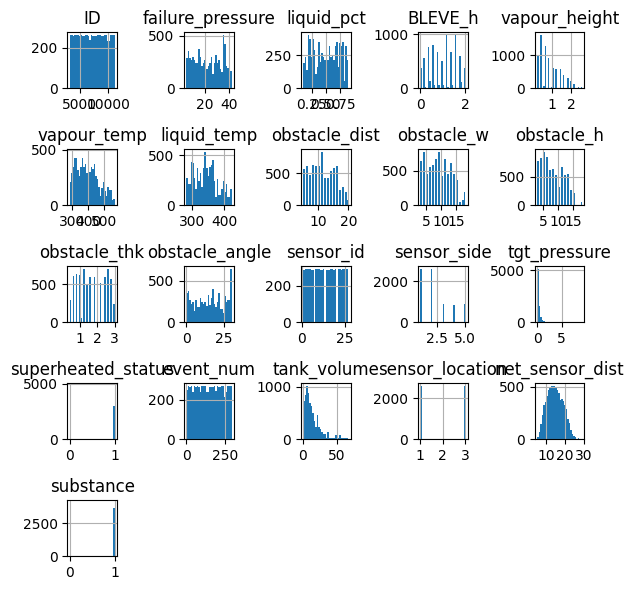

In [76]:
model_data.hist(bins = 30, figsize = (6,6))
plt.tight_layout()
plt.show()

Unnecessary data points:
* ID
* event_num
* sensor_location

In [77]:
model_data.drop(["ID", "event_num","sensor_location"], axis = 1, inplace = True)
model_val.drop(["ID", "event_num","sensor_location"], axis = 1, inplace = True)
ext_test.drop(["ID","sensor_location"], axis = 1, inplace = True)

### Initial Model

In [78]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [3, 5, 8],
        'min_samples_leaf': [2, 3, 5]
    }

In [79]:
def rf_fxn(sensor_id, model_data, validation_split, param_grid, grid_search = True, prediction = False):
    train_data = model_data[model_data['sensor_id'] == sensor_id]
    
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = validation_split[validation_split['sensor_id'] == sensor_id]
    
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']


    if grid_search == True:
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = mape_scorer, verbose = 0, cv = 3, n_jobs = -1)
    
        # temp_time = time.time()
        grid_search.fit(X_train, y_train)
        # print(f"{sensor_id} time: {time.time() - temp_time:.2f}")
        
        best_rf_model = grid_search.best_estimator_
        y_pred = best_rf_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape, grid_search.best_params_


    else:
        n_estimators = param_grid["n_estimators"]
        max_depth = param_grid["max_depth"]
        min_samples_leaf = param_grid["min_samples_leaf"]
        min_samples_split = param_grid["min_samples_split"]
        
        rf_model = RandomForestRegressor(n_estimators = n_estimators, 
                                         max_depth = max_depth, 
                                         min_samples_leaf = min_samples_leaf, 
                                         min_samples_split = min_samples_split, 
                                         random_state=42)
        rf_model.fit(X_train, y_train)
    
        if prediction == True:
            X_test = raw_test_data3[raw_test_data3['sensor_id'] == sensor_id]
        
            y_pred_array = rf_model.predict(X_test)
            y_pred = pd.Series(y_pred_array, X_test.index).clip(lower = 0)
            
            return y_pred
            
       
        y_pred = rf_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape

In [ ]:
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_train_and_eval(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T

In [ ]:
param_grid = {
        'n_estimators': [20, 50, 100],
        'max_depth': [None, 10, 15],
        'min_samples_split': [3],
        'min_samples_leaf': [1, 2, 3, 4]
    }

In [ ]:
# After new data split
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_fxn(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T
display(params_df)

In [ ]:
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_train_and_eval(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T
display(params_df)

In [ ]:
for col in params_df:
    display(pd.DataFrame(params_df[col].value_counts()).reset_index())

In [80]:
class TreeCV:
    """Perform a cross-validation for chosen hyperparameter"""

    def __init__(self, X, Y, hp="max_depth", tree_type = "rf"):
        """Save training data"""
        self.X = X    # features
        self.Y = Y    # targets
        self.hp = hp  # hyperparameter
        self.tree_type = tree_type

    def set_method(self, hp):
        """Set hyperparameter to use"""
        self.hp = hp

    def cross_me(self, *hp_vals):
        """Perform cross validation for given hyperparameter values"""
        self.scores = []  # the accuracy table
        self.best = None  # the best fit

        best_score = 0

        for hp in hp_vals:
            # create a tree with given hyperparameter cut
            if self.tree_type == "rf":
                fit = RandomForestRegressor(random_state=42, **{self.hp: hp})
            elif self.tree_type == "xgb":
                fit = XGBRegressor(random_state=42, **{self.hp: hp})
            else:
                raise ValueError("Invalid tree_type")

            # calculate a cross validation scores and a mean value
            score = cross_val_score(fit, self.X, self.Y).mean()

            # update best fit if necessary
            if score > best_score:
                self.best = fit
                best_score = score

            self.scores.append([hp, score])

        # train the best fit
        self.best.fit(self.X, self.Y)

    def plot(self):
        """Plot accuracy as a function of hyperparameter values and best fit"""
        plt.figure(figsize=(3, 2))

        plt.xlabel(self.hp)
        plt.ylabel("accuracy")

        plt.plot(*zip(*self.scores), marker = "o")
        plt.title(f"{self.hp}")

        plt.show()


In [ ]:
tree_handler = TreeCV(temp_x, temp_y, "max_depth")
tree_handler.cross_me(*range(1, 20))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "n_estimators")
tree_handler.cross_me(*range(10, 200, 10))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "min_samples_split")
tree_handler.cross_me(*range(2, 10))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "min_samples_leaf")
tree_handler.cross_me(*range(1, 5))
tree_handler.plot()

### Model Creation

In [ ]:
final_param_grid = {
        'n_estimators': 100, 
        'max_depth': 10, 
        'min_samples_split': 3,
        'min_samples_leaf': 2
    }

In [ ]:
preds = []
unique_sensors = model_data['sensor_id'].sort_values().unique()

for sensor in unique_sensors:
    temp_pred = rf_final(sensor, model_data, model_val, final_param_grid, prediction = True)
    preds.append(temp_pred)
    
preds_concat = pd.concat(preds).sort_index()


In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

## XGBoost

In [82]:
# Saving train and val data for each sensor to "data_dict"
data_dict = {}
unique_sensors = model_data["sensor_id"].unique()
unique_sensors.sort()

for sensor in unique_sensors:
    train_data = model_data[model_data['sensor_id'] == sensor]
    
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = model_val[model_val['sensor_id'] == sensor]
    val_data.drop([])
    
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']

    X_test_ext = ext_test[ext_test['sensor_id'] == sensor]
    
    data_dict[sensor] = (X_train, y_train, X_val, y_val, X_test_ext)

In [83]:
X_train_1, y_train_1, X_val_1, y_val_1, X_test_ext_1 = data_dict[1]
X_train_10, y_train_10, X_val_10, y_val_10, X_test_ext_10 = data_dict[10]

### Functions

In [84]:
def param_freq(params_df):
    for col in params_df.columns:
        display(pd.DataFrame(params_df[col].value_counts()).reset_index())

In [85]:
def gridCV_sim(fxn = "xgb", params_df = True):
    mapes = []
    params_dict = {}
    
    for sensor, dict_val in data_dict.items():
        if fxn == "xgb":
            mape, best_params = xgb_fxn(dict_val, param_grid)
        sensor_str = str(int(sensor)).rjust(2)
        print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
        mapes.append(mape)
        params_dict[sensor] = best_params
    
    print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

    if params_df:
        params_df = pd.DataFrame(params_dict).T
        param_freq(params_df)

In [86]:
# Grid Search
def xgb_fxn(dict_val, param_grid, grid_search = True, prediction = False):
    
    X_train, y_train, X_val, y_val, X_test_ext = dict_val
    
    if grid_search == True:
        xgb_reg = XGBRegressor(random_state = 42,
                          # n_estimators = 50,
                          # max_depth = 6, 
                          early_stopping_rounds = 10,
                          eval_metric = "mape",
                         )
        
        grid_search = GridSearchCV(estimator = xgb_reg, 
                                   param_grid = param_grid, 
                                   scoring = mape_scorer, 
                                   verbose = 0, 
                                   cv = 3, 
                                   n_jobs = -1)
    
        # temp_time = time.time()
        grid_search.fit(X_train, 
                        y_train,
                        eval_set = [(X_val, y_val)],
                        verbose = False
                       )
        # print(f"{sensor_id} time: {time.time() - temp_time:.2f}")
        
        best_xgb_model = grid_search.best_estimator_
        y_pred = best_xgb_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape, grid_search.best_params_


    else:

        xgb_model = XGBRegressor(n_estimators = param_grid["n_estimators"], 
                                max_depth = param_grid["max_depth"], 
                                eta = param_grid["eta"],
                                min_child_weight = param_grid["min_child_weight"],
                                random_state=42)
        xgb_model.fit(X_train, y_train)
    
        if prediction == True:
            y_pred_array = xgb_model.predict(X_test_ext)
            y_pred = pd.Series(y_pred_array, X_test_ext.index).clip(lower = 0)
            
            return y_pred
            
            
        y_pred = xgb_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape


### Models

In [ ]:
preds = []
mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    xgb_reg = XGBRegressor(random_state = 42,
                          n_estimators = 100,
                          # max_depth = 6, 
                          early_stopping_rounds = 20,
                          eval_metric = "mape",
                         )
    xgb_reg.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )

    evals_result = xgb_reg.evals_result()
    final_mape = evals_result["validation_0"]["mape"][-1]
    print(f"{str(int(sensor)).rjust(2)}: {final_mape:.5f}")
    mapes.append(final_mape)

#     y_pred_array = xg_reg.predict(X_test_ext)
#     y_pred = pd.Series(y_pred_array, X_test_ext.index).clip(lower = 0)
#     preds.append(y_pred)

# preds_concat = pd.concat(preds).sort_index()

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

### Tree CV

In [ ]:
params_treecv = {"eta": [i/100 for i in range(1, 30, 2)],
                 "max_depth": range(1,10),
                 "n_estimators": range(10, 200, 10),
                 "min_child_weight": range(1,15),
                 "max_leaves": range(1, 20)
                }


In [ ]:
temp = model_data[model_data['sensor_id'] == 2]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


In [ ]:
temp = model_data[model_data['sensor_id'] == 1]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

In [ ]:
temp = model_data[model_data['sensor_id'] == 2]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

In [ ]:
temp = model_data[model_data['sensor_id'] == 3]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

In [ ]:
# Conclusion:
# eta = 0.1
# max_depth = 2
# n_estimators = 50

In [ ]:
# Investigating min_child_weight further:
for i in range(10):
    temp = model_data[model_data['sensor_id'] == i+1]
    temp_x = temp.drop(['tgt_pressure'], axis=1)
    temp_y = temp['tgt_pressure']

    tree_handler = TreeCV(temp_x, temp_y, "min_child_weight", tree_type = "xgb")
    tree_handler.cross_me(*range(1,50,2))
    tree_handler.plot()

In [ ]:
# Looking at the above data points, it apperas that maximum accuracy is generally achieved with a child weight bewteen 10 and 30

### Hyperparam Tuning

In [ ]:
# After redefining train test split
gridCV_sim()

In [ ]:
param_grid = {
    'n_estimators': [80,100,150], 
    'max_depth': [1,2,3,4],
    "eta": [0.1,0.15,0.2],
    "min_child_weight": [3,5,10],
    }
gridCV_sim()

In [ ]:
param_grid = {
    'n_estimators': [80,150], 
    'max_depth': [3],
    "eta": [0.15],
    "min_child_weight": [5,8,10],
    }
gridCV_sim()

In [ ]:
param_grid = {
    'n_estimators': [100,], 
    'max_depth': [3],
    "eta": [0.15],
    "min_child_weight": [8],
    }
gridCV_sim()

In [ ]:
final_param_grid = {
    'n_estimators': 100,
    'max_depth': 3,
    "eta": 0.15,
    "min_child_weight": 8,
    }

### Model Creation

In [ ]:
# With the new data split
preds = []

for sensor, dict_val in data_dict.items():
    temp_pred = xgb_fxn(dict_val, final_param_grid, grid_search = False, prediction = True)
    preds.append(temp_pred)

preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### Bayesian Optimisation

In [87]:
def xgb_objective(trial, X_train, y_train, X_val, y_val):
    n_estimators = 150 # trial.suggest_int("n_estimators", 80, 200)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 15)
    max_leaves = trial.suggest_int("max_leaves", 3, 12)
    eta = 0.15 # trial.suggest_float("eta", 0.05, 0.25)
    # min_split_loss = trial.suggest_float("min_split_loss", 1e-5, 0.001, log = True)
    # reg_alpha = trial.suggest_float("reg_alpha", 0, 1)

    xgb_model = XGBRegressor(n_estimators = n_estimators,
                         max_depth = max_depth,
                         max_leaves = max_leaves,
                         eta = eta,
                         min_child_weight = min_child_weight,
                         # min_split_loss = min_split_loss,
                         # reg_alpha = reg_alpha,
                         n_jobs = -1,
                         random_state = 42,
                        )
    
    xgb_model.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = xgb_model.predict(X_val)
    score = mape_calc(y_val, y_pred)
    # print(score)

    # score = - cross_val_score(xgb_model, X_val, y_val, cv = 5, scoring = "neg_mean_absolute_percentage_error", n_jobs = -1).mean()
    
    return score



def train_best_xgb(best_params):
    model = XGBRegressor(
        n_estimators = 150,
        max_depth = best_params["max_depth"],
        max_leaves = best_params["max_leaves"],
        eta = 0.15,
        min_child_weight = best_params["min_child_weight"],
        n_jobs = -1,
        random_state = 42,
    )

    return model


In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(lambda trial: xgb_objective(trial, X_train_10, y_train_10, X_val_10, y_val_10), n_trials=200, n_jobs=-1)

In [ ]:
study.best_params

In [ ]:
opt_vis.plot_optimization_history(study)

In [ ]:
display(opt_vis.plot_slice(study),
        opt_vis.plot_parallel_coordinate(study),
        opt_vis.plot_param_importances(study),
       )

In [ ]:
result = {}
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: xgb_objective(trial, X_train, y_train, X_val, y_val), n_trials=150, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_xgb = train_best_xgb(best_params)
    best_xgb.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )
    
    y_pred = best_xgb.predict(X_val)
    score = mape_calc(y_val, y_pred)

    ext_pred = best_xgb.predict(ext_test)
    temp_pred = pd.Series(ext_pred, ext_test.index).clip(lower = 0)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{int(sensor)}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
display(pd.DataFrame(result.values()))
display(pd.DataFrame(result.values()).mean())

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

## Neural Networks

In [88]:
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

def leaky_relu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

In [89]:
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, pred, targets):
        return torch.mean(torch.abs(1 - pred / targets))


class torchNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(17,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,1),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

In [90]:
torch_nn = torchNN()

In [91]:
criterion = CustomLoss()  # nn.MSELoss()
optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW

In [92]:
torch.manual_seed(42)

mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    torch_nn = torchNN()
    criterion = CustomLoss()  # nn.MSELoss()
    optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW
    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)


    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 20
    patience = patience_val
    
    n_epochs = 1000
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = torch_nn(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()
        # print(f"{epoch}: {loss:.4f}")
    
        torch_nn.eval()
    
        with torch.no_grad():
            y_pred = pd.Series(torch_nn(X_val_torch).numpy().flatten(), index = X_val.index)
            mape = mape_calc(y_val, y_pred)
    
        if mape < best_score:
            best_score = mape
            best_model_weights = copy.deepcopy(torch_nn.state_dict())  # Deep copy here      
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

    mapes.append(mape)
    print(f"{str(int(sensor)).rjust(2)}: {best_score:.5f}\n")
    

np.mean(mapes)

### 87: 0.28205 ###
 1: 0.28205

### 157: 0.22134 ###
 2: 0.22134

### 124: 0.33738 ###
 3: 0.33738

### 117: 0.48591 ###
 4: 0.48591

### 112: 0.46342 ###
 5: 0.46342

### 174: 0.45893 ###
 6: 0.45893

### 23: 0.66597 ###
 7: 0.66597

### 166: 0.44920 ###
 8: 0.44920

### 3: 1.34386 ###
 9: 1.34386

### 363: 0.33171 ###
10: 0.33171

### 11: 0.50738 ###
11: 0.50738

### 105: 0.43223 ###
12: 0.43223

### 233: 0.33363 ###
13: 0.33363

### 50: 0.41354 ###
14: 0.41354

### 179: 0.32685 ###
15: 0.32685

### 45: 0.39463 ###
16: 0.39463

### 240: 0.33392 ###
17: 0.33392

### 312: 0.30174 ###
18: 0.30174

### 247: 0.32807 ###
19: 0.32807

### 320: 0.31120 ###
20: 0.31120

### 15: 0.56681 ###
21: 0.56681

### 193: 0.30315 ###
22: 0.30315

### 158: 0.31584 ###
23: 0.31584

### 223: 0.33910 ###
24: 0.33910

### 236: 0.34445 ###
25: 0.34445

### 153: 0.41781 ###
26: 0.41781

### 201: 0.32264 ###
27: 0.32264



0.685290389154563

In [117]:
torch.manual_seed(42)

mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    torch_nn = torchNN()
    criterion = CustomLoss()  # nn.MSELoss()
    optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW
    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

    n_epochs = 1000
    
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = torch_nn(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()
    
    torch_nn.eval()

    with torch.no_grad():
        y_pred = pd.Series(torch_nn(X_val_torch).numpy().flatten(), index = X_val.index)
        # print(y_pred, y_val)
    # display(y_pred.head())
    # display(y_pred.shape, y_val.shape)
    mape = mape_calc(y_val, y_pred)
    mapes.append(mape)
    print(f"{str(int(sensor)).rjust(2)}: {mape:.5f}")

np.mean(mapes)

 1: 0.21372
 2: 0.20088
 3: 0.24356
 4: 0.34921
 5: 0.78063
 6: 0.42000
 7: 0.29010
 8: 0.26939
 9: 0.29051
10: 0.30116
11: 0.33184
12: 0.31576
13: 0.26190
14: 0.30164
15: 0.32796
16: 0.24857
17: 0.27402
18: 0.30270
19: 0.29278
20: 0.34822
21: 0.41999
22: 0.31917
23: 0.26275
24: 0.27244
25: 0.31658
26: 0.23256
27: 0.35964


0.31658109736468965

### Bayesian Optimisation

#### Set-Up and First Optimisation

In [93]:
def model_builder(trial):
    n_layers = trial.suggest_int("n_layers", 1, 5)
    layers = []
    
    in_features = 17
    activation = trial.suggest_categorical("activation", ["ReLU","Tanh","LeakyReLU"])
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))

        if activation == "Tanh":
            layers.append(nn.Tanh())
        elif activation == "LeakyReLU":
            layers.append(nn.LeakyReLU())
        else: 
            layers.append(nn.ReLU())
        
        # p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        # layers.append(nn.Drouput(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def objective(trial):    
    X_torch = torch.tensor(X_train_1.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train_1.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val_1.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val_1.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    optimizer_name = trial.suggest_categorical("optimizer",["Adam","SGD"])
    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    criteron = CustomLoss()
    
    n_epochs = 100    
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

    nn_model.eval()
    with torch.no_grad():        
        y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val_1.index)
        score = mape_calc(y_val_1, y_pred)

    

    return score
    
    

In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))

In [ ]:
study.optimize(objective, n_trials = 200, n_jobs = -1)

In [ ]:
# output of various sim:
display(pd.DataFrame(Out[135].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[132].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[129].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[126].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[144].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[148].items(), columns = ["params", "vals"]),
       )

In [ ]:
study.best_params

In [ ]:
def outlier_trial(trial):
    return trial.value is not None and trial.value > 1
    
all_trials = study.trials
filtered_trials = [trial for trial in all_trials if not outlier_trial(trial)]
filtered_study = optuna.create_study(study_name='filtered_study')
for trial in filtered_trials:
    filtered_study.add_trial(trial)

opt_vis.plot_optimization_history(filtered_study)

In [ ]:
opt_vis.plot_param_importances(study)

#### Further Optimisation

In [78]:
def model_builder(trial):
    n_layers = trial.suggest_int("n_layers", 1, 5)
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def objective(trial):    
    X_torch = torch.tensor(X_train_1.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train_1.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val_1.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val_1.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    optimizer_name = trial.suggest_categorical("optimizer",["Adam","AdamW"])
    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    criteron = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    # n_epochs = trial.suggest_int("n_epochs", 100, 1000)    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

        nn_model.eval()
        with torch.no_grad():        
            y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val_1.index)
            score = mape_calc(y_val_1, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict())  # Deep copy here      
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

        
        trial.report(score, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
            
    nn_model.load_state_dict(best_model_weights)
    return score
    
    

In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(objective, n_trials = 50, n_jobs = -1)

study.best_params

In [ ]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(objective, n_trials = 50, n_jobs = -1)

study.best_params

In [ ]:
display(pd.DataFrame(Out[175].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[188].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[210].items(), columns = ["params", "vals"]),
        # increased number of layers to 10, removed "RMSprop" optimiser
        pd.DataFrame(Out[219].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[223].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[278].items(), columns = ["params", "vals"]),
       )

In [ ]:
def outlier_trial(trial):
    return trial.value is not None and trial.value > 1

all_trials = study.trials
filtered_trials = [trial for trial in all_trials if not outlier_trial(trial)]
filtered_study = optuna.create_study(study_name='filtered_study')
for trial in filtered_trials:
    filtered_study.add_trial(trial)

display(opt_vis.plot_optimization_history(study),
        opt_vis.plot_optimization_history(filtered_study),
        opt_vis.plot_param_importances(filtered_study),
       )

#### Extending To All Sensor & Predictions

In [94]:
def model_builder(trial): # unch from original
    n_layers = trial.suggest_int("n_layers", 2, 5)
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)

def objective(trial, X_train, y_train, X_val, y_val):    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    # optimizer_name = trial.suggest_categorical("optimizer",["Adam","AdamW"])
    # optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    optimizer = torch.optim.Adam(nn_model.parameters(), lr=lr, weight_decay=weight_decay)
    criteron = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    # n_epochs = trial.suggest_int("n_epochs", 10, 1000)    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

        nn_model.eval()
        with torch.no_grad():        
            y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

        
        trial.report(score, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_score



def final_model(best_params):
    n_layers = best_params["n_layers"]
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = best_params[f"n_units_l{i}"]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = best_params[f"dropout_l{i}"]
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def train_best_nn(X_train, y_train, X_val, y_val, best_params):
    model = final_model(best_params)

    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

    optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])
    criterion = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)

        l1_reg = 0
        for param in model.parameters():
            l1_reg += torch.norm(param, 1)

        loss += best_params["weight_decay"] * l1_reg
        
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():      
            y_pred = pd.Series(model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

    model.load_state_dict(best_model_weights)
    return model


def predict(model, X_test_ext):
    X_ext_tensor = torch.tensor(X_test_ext.values, dtype=torch.float32)

    with torch.no_grad():
        preds_array = model(X_ext_tensor).numpy().flatten()
        pred = pd.Series(preds_array, X_test_ext.index).clip(lower = 0)

    return pred

In [ ]:
# Adding Regularisation
result = {}
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)

    # display(opt_vis.plot_optimization_history(study), 
    #         opt_vis.plot_slice(study, params = ["weight_decay", "n_layers", "lr", "dropout_l0", "n_units_l0"]))
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, X_val, y_val, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    sensor_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27 - sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {sensor_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
pd.DataFrame(result.values(), index = result.keys())#).mean()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [ ]:
result = {}
preds = []

for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = (total_time * (27 - sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
display(pd.DataFrame(result.values()))

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [ ]:
result = {}
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, X_val, y_val, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time)/sensor * (27-sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

In [ ]:
display(pd.DataFrame(result.values()))

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

# External

## Real-World Research

In [95]:
expl_data = model_data.copy()

Here we have the properties of the 2 unique substances present in our data

In [96]:
substance_properties

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                            37.9                            -1.0   
1                            42.5                           -42.0   

   Liquid Critical Temperature (K)  
0                            152.0  
1                             96.7

As mentioned in 2.3.2 (and by using common sense), a sub-0 boiling temperature raises some red flags and that they instead might be in degrees celsius. 

Through some elementary research, we can discover that these are the distinct properties of 2 unique molecules; n-butane and propane respectively.

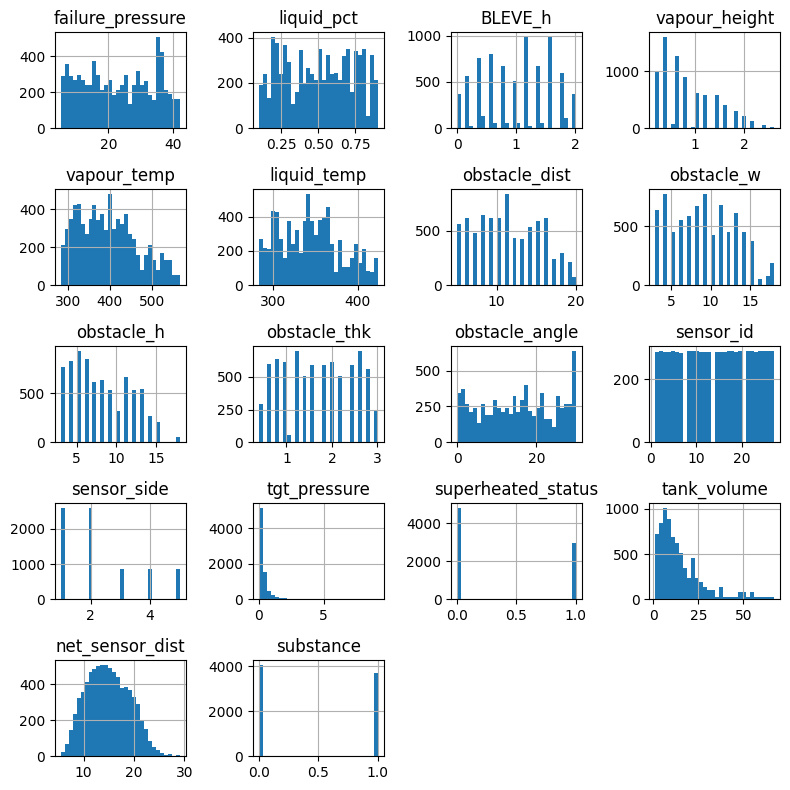

In [97]:
expl_data.hist(bins = 30, figsize = (8,8))
plt.tight_layout()
plt.show()

In [98]:
expl_data

failure_pressure  liquid_pct  BLEVE_h  vapour_height  vapour_temp  \
0                 7.32        0.42     1.79          0.605      522.915   
1                 7.32        0.42     1.79          0.605      522.915   
2                 7.32        0.42     1.79          0.605      522.915   
3                 7.32        0.42     1.79          0.605      522.915   
4                 7.32        0.42     1.79          0.605      522.915   
...                ...         ...      ...            ...          ...   
7890             22.42        0.70     1.80          0.800      367.360   
7891             22.42        0.70     1.80          0.800      367.360   
7892             22.42        0.70     1.80          0.800      367.360   
7893             22.42        0.70     1.80          0.800      367.360   
7894             22.42        0.70     1.80          0.800      367.360   

      liquid_temp  obstacle_dist  obstacle_w  obstacle_h  obstacle_thk  \
0          354.43           11.0        11.0        13.0         0.615   
1          354.43           11.0        11.0        13.0         0.615   
2          354.43           11.0        11.0        13.0         0.615   
3          354.43           11.0        11.0        13.0         0.615   
4          354.43           11.0        11.0        13.0         0.615   
...           ...            ...         ...         ...           ...   
7890       330.67           18.0         4.0         8.0         2.410   
7891       330.67           18.0         4.0         8.0         2.410   
7892       330.67           18.0         4.0         8.0         2.410   
7893       330.67           18.0         4.0         8.0         2.410   
7894       330.67           18.0         4.0         8.0         2.410   

      obstacle_angle  sensor_id  sensor_side  tgt_pressure  \
0               13.0       18.0          2.0      0.199929   
1               13.0       19.0          3.0      0.435681   
2               13.0       20.0          3.0      0.264031   
3               13.0       21.0          3.0      0.270576   
4               13.0       22.0          4.0      0.204675   
...              ...        ...          ...           ...   
7890            25.0       23.0          4.0      0.100555   
7891            25.0       24.0          4.0      0.092211   
7892            25.0       25.0          5.0      0.105432   
7893            25.0       26.0          5.0      0.102144   
7894            25.0       27.0          5.0      0.095301   

      superheated_status  tank_volume  net_sensor_dist  substance  
0                    1.0      12.9330        17.012366        0.0  
1                    1.0      12.9330        13.362956        0.0  
2                    1.0      12.9330        13.105899        0.0  
3                    1.0      12.9330        15.631398        0.0  
4                    1.0      12.9330        15.759572        0.0  
...                  ...          ...              ...        ...  
7890                 0.0      17.4096        21.714742        0.0  
7891                 0.0      17.4096        22.472428        0.0  
7892                 0.0      17.4096        22.534474        0.0  
7893                 0.0      17.4096        22.211765        0.0  
7894                 0.0      17.4096        22.534474        0.0  

[7776 rows x 18 columns]

In [99]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

<Axes: >

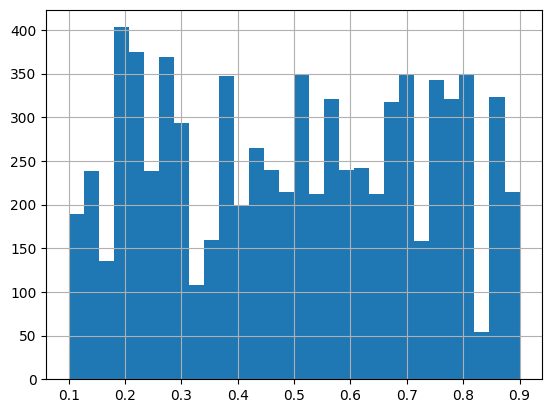

In [100]:
expl_data.liquid_pct.hist(bins = 30)

In [101]:
def enthalpy_of_vap(substance_dict, df):
    lookup = substance_dict
    # t0 = df[]
    tb = lookup["tb"]
    tc = lookup["tc"]
    pc = lookup["pc"]

    num = 1.092 * 8.3145 * tb * (np.log(pc) - 1.013)
    denom = 0.93 - tb / tc
    frac = (tc - t0) / (tc - tb)

    return num / denom * frac ** 0.383

In [102]:
n_butane_props = {
    "tb": -1 + 273.15,
    "tc": 425.1,
    "pc": 3796.0,
}

propane_props = {
    "tb": -42 + 273.15 ,
    "tc": 369.522,
    "pc": 4249.24,
}

In [103]:
# Calculating the boiling point at the failure pressure through the Classius-Clayperton equation

def calc_new_BP(p2, element):
    if element == "n-butane" or element == 0:
        h = 22.40 * 1000
        p1 = 1
        t1 = -1 + 273.15
    elif element == "propane" or element == 1:
        h = 16.25 * 1000
        p1 = 1
        t1 = -42 + 273.15
    else:
        raise ValueError("Element must be propane or n-butane")

    calc = 1/t1 - 8.3145 * np.log(p2/p1)/h
    return round(1/calc, 3)

In [104]:
map_dict = {0: -1.0, 1: -42.0}
expl_data["BP_orig"] = expl_data["substance"].map(map_dict)
expl_data["BP_new"] = expl_data.apply(lambda row: calc_new_BP(row["failure_pressure"], row["substance"]), axis = 1)
expl_data["temp_excess"] =  expl_data["liquid_temp"] - expl_data["BP_new"]

In [105]:
expl_data

failure_pressure  liquid_pct  BLEVE_h  vapour_height  vapour_temp  \
0                 7.32        0.42     1.79          0.605      522.915   
1                 7.32        0.42     1.79          0.605      522.915   
2                 7.32        0.42     1.79          0.605      522.915   
3                 7.32        0.42     1.79          0.605      522.915   
4                 7.32        0.42     1.79          0.605      522.915   
...                ...         ...      ...            ...          ...   
7890             22.42        0.70     1.80          0.800      367.360   
7891             22.42        0.70     1.80          0.800      367.360   
7892             22.42        0.70     1.80          0.800      367.360   
7893             22.42        0.70     1.80          0.800      367.360   
7894             22.42        0.70     1.80          0.800      367.360   

      liquid_temp  obstacle_dist  obstacle_w  obstacle_h  obstacle_thk  ...  \
0          354.43           11.0        11.0        13.0         0.615  ...   
1          354.43           11.0        11.0        13.0         0.615  ...   
2          354.43           11.0        11.0        13.0         0.615  ...   
3          354.43           11.0        11.0        13.0         0.615  ...   
4          354.43           11.0        11.0        13.0         0.615  ...   
...           ...            ...         ...         ...           ...  ...   
7890       330.67           18.0         4.0         8.0         2.410  ...   
7891       330.67           18.0         4.0         8.0         2.410  ...   
7892       330.67           18.0         4.0         8.0         2.410  ...   
7893       330.67           18.0         4.0         8.0         2.410  ...   
7894       330.67           18.0         4.0         8.0         2.410  ...   

      sensor_id  sensor_side  tgt_pressure  superheated_status  tank_volume  \
0          18.0          2.0      0.199929                 1.0      12.9330   
1          19.0          3.0      0.435681                 1.0      12.9330   
2          20.0          3.0      0.264031                 1.0      12.9330   
3          21.0          3.0      0.270576                 1.0      12.9330   
4          22.0          4.0      0.204675                 1.0      12.9330   
...         ...          ...           ...                 ...          ...   
7890       23.0          4.0      0.100555                 0.0      17.4096   
7891       24.0          4.0      0.092211                 0.0      17.4096   
7892       25.0          5.0      0.105432                 0.0      17.4096   
7893       26.0          5.0      0.102144                 0.0      17.4096   
7894       27.0          5.0      0.095301                 0.0      17.4096   

      net_sensor_dist  substance  BP_orig   BP_new  temp_excess  
0           17.012366        0.0     -1.0  340.650       13.780  
1           13.362956        0.0     -1.0  340.650       13.780  
2           13.105899        0.0     -1.0  340.650       13.780  
3           15.631398        0.0     -1.0  340.650       13.780  
4           15.759572        0.0     -1.0  340.650       13.780  
...               ...        ...      ...      ...          ...  
7890        21.714742        0.0     -1.0  396.812      -66.142  
7891        22.472428        0.0     -1.0  396.812      -66.142  
7892        22.534474        0.0     -1.0  396.812      -66.142  
7893        22.211765        0.0     -1.0  396.812      -66.142  
7894        22.534474        0.0     -1.0  396.812      -66.142  

[7776 rows x 21 columns]

In [106]:
sensor1 = list(expl_data.groupby("sensor_id"))[14][1]

In [107]:
# Plotting Variables vs tgt_pressure
def plot_tgt_var(df, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    numeric_cols = df[vars].select_dtypes(include = np.number).columns.to_list()
    n_cols = n_cols
    n_rows = int(len(numeric_cols) / n_cols) + (len(numeric_cols) % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for col_name in numeric_cols:
        if col_name != "tgt_pressure":
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{col_name}")
            i += 1
    
    plt.tight_layout()
    plt.show()

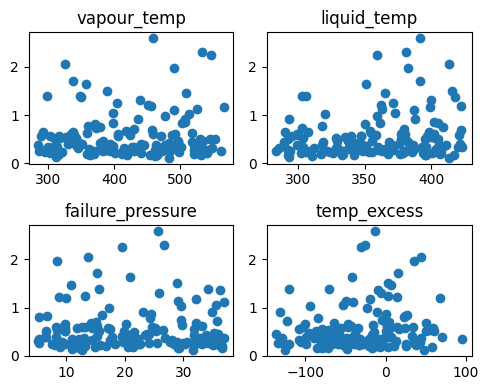

In [108]:
plot_tgt_var(sensor1.query("substance == 0"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

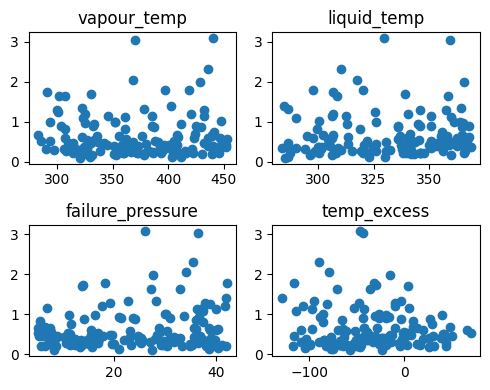

In [109]:
plot_tgt_var(sensor1.query("substance == 1"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

## Vapour Height Calculation

"liquid_pct" is equivalent to the "Liquid Fill Ratio" or "Liquid Fill Level", so we should be able to back out "vapour height" by multiplying "tank height" by "(1 - liquid_pct)"

In [60]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

In [110]:
temp = raw_data7.copy().rename(columns = dict_names)[["liquid_pct","vapour_height","tank_h"]]

In [111]:
temp["vapour_height_calc"] = temp["tank_h"] * (1 - temp["liquid_pct"])
temp["dif_amt"] = temp["vapour_height"] - temp["vapour_height_calc"]
temp["dif_ratio"] = 1 - temp["vapour_height_calc"]/temp["vapour_height"]

In [112]:
temp2 = raw_data.copy()

In [113]:
temp2["vapour_height_calc"] = temp2["Tank Height (m)"] * (1 - temp2["Liquid Ratio (%)"])
temp2["dif_amt"] = temp2["Vapour Height (m)"] - temp2["vapour_height_calc"]
temp2["dif_ratio"] = 1 - temp2["vapour_height_calc"]/temp2["Vapour Height (m)"]

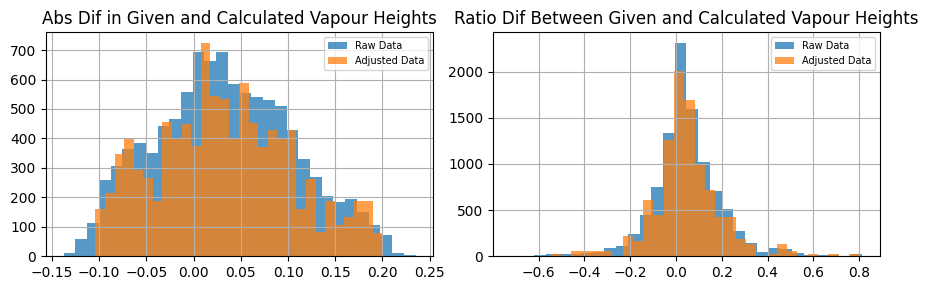

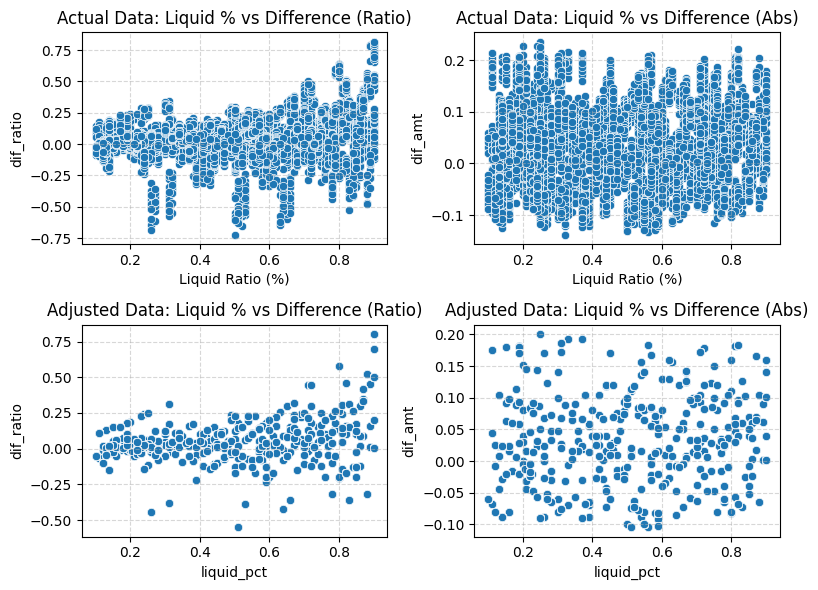

In [131]:
fig, ax = plt.subplots(1, 2, figsize = (9, 3))

temp2["dif_amt"].hist(bins = 30, alpha = 0.75, label = "Raw Data", ax = ax[0])
temp["dif_amt"].hist(bins = 30, alpha = 0.75, label = "Adjusted Data", ax = ax[0])
ax[0].legend(fontsize = 7)
ax[0].set_title("Abs Dif in Given and Calculated Vapour Heights")

temp2["dif_ratio"].hist(bins = 30, alpha = 0.75, label = "Raw Data", ax = ax[1])
temp["dif_ratio"].hist(bins = 30, alpha = 0.75, label = "Adjusted Data", ax = ax[1])
ax[1].legend(fontsize = 7)
ax[1].set_title("Ratio Dif Between Given and Calculated Vapour Heights")

plt.tight_layout()
plt.show()



fig, ax = plt.subplots(2, 2, figsize = (8, 6))
ax = ax.flatten()

sns.scatterplot(data = temp2, x = "Liquid Ratio (%)", y = "dif_ratio", ax = ax[0]).set_title("Actual Data: Liquid % vs Difference (Ratio)")
ax[0].grid(True, linestyle = "--", alpha = 0.5)

sns.scatterplot(data = temp2, x = "Liquid Ratio (%)", y = "dif_amt", ax = ax[1]).set_title("Actual Data: Liquid % vs Difference (Abs)")
ax[1].grid(True, linestyle = "--", alpha = 0.5)

sns.scatterplot(data = temp, x = "liquid_pct", y = "dif_ratio", ax = ax[2]).set_title("Adjusted Data: Liquid % vs Difference (Ratio)")
ax[2].grid(True, linestyle = "--", alpha = 0.5)

sns.scatterplot(data = temp, x = "liquid_pct", y = "dif_amt", ax = ax[3]).set_title("Adjusted Data: Liquid % vs Difference (Abs)")
ax[3].grid(True, linestyle = "--", alpha = 0.5)

plt.tight_layout()
plt.show()

We can see above that there does not appear to be a clear relationship between "Liquid Ratio (%)" and the error present in the data. This was tested as the data may have been generated from a non-rectangular (e.g. cylindrical) tank, in which case smaller "liquid_pct" values would lead to relatively large vapour_height values up until 50% fill ratio, beyond which these values would be relatively low vapour_height values - with the overall shape being similar to a -x^3 graph, due to the fact that horizontal cylinders are 1) initally "quick" to fill (filling it at a certain rate corresponds to a relatively large increase in height), before 2) slowing down in the middle as the tank widens, before 3) speeding up again as the tank gets full.

This is to say that the noise in our data doesn't appear to be due to incorrect measurements, instead just random noise that has been added to the data. As there is no way of validating which values are the "true" values, there is no way to confirm which metric for vapour_height is more accurate, however, since our calculated vapour height involves 2 sources of uncertainity, we will instead just use the given values for vapour_height.

## Liquid Correction Method

BLEVEs are one of the explosions that can occur when a vessel carrying LPG is ruptured. The liquid is contained inside a pressurised vessel, and thus can be contained as a liquid whilst being at temperature higher than it's boiling point at atmospheric conditions (i.e. it's "normal boiling point"). Such liquids are referred to as being "superheated", whereas liquids whose temperature is below its "normal boiling point" are referred to as "subcooled".

When a substance is superheated, a rapid depressurisation from failure of the vessel will lead to mass boiling of liquid, being quickly converted to vapour. The pressure wave from this rapid expansion of vapour is what ultimately leads to the damage caused by BLEVEs.

From the attached reading and its references (papers by QiLin Li), we can learn that the initial pressure of the explosion is caused by 2 separate factors: 1) the existing vapour in the tank escaping, and 2) the liquid flashing. These can either be modelled separately ("shock tube method") or simultaneously ("liquid correction method"). 

In the liquid flashing method, we can calculate the percentage of the liquid which evaporates (f). Whilst this can later be used to calculate the initial explosion pressure, it appears that this value has already been given to us (as "Tank Failure Pressure (bar)" - later renamed to "failure_pressure"), however, this factor may still be good to have in our model (e.g. as an input in a neural network), so we will still calculate this for each data point.

In [231]:
# Using the NIST database
cp = pd.DataFrame.from_dict({"n-butane": 130, "propane": 100}, orient = "index", columns = ["cp"])

In [232]:
substance_dict = substance_properties.copy()
substance_dict.columns = ["pc", "tb", "tc"]
substance_dict = pd.concat([substance_dict, cp], axis = 1)

In [264]:
# t0 = temp at explosion
# tc = critical temp
# tb = boiling temp
# pc = critical pressure

def Hv(superheated, substance_val, liquid_temp, substance_dict = substance_dict):
    # if substance not in ["propane", "n-butane"]:
    #     raise ValueError("Invalid Substance Specified")

    if substance_val == 0:
        substance = "n-butane"
    if substance_val == 1:
        substance = "propane"
    
    lookup = substance_dict.loc[substance]
    
    t0 = liquid_temp
    tb = lookup["tb"] + 273.15
    tc = lookup["tc"] + 273.15
    pc = lookup["pc"]
    
    num = 1.092 * 8.3145 * tb * (np.log(pc) - 1.013)
    denom = 0.93 - tb / tc
    frac = (tc - t0) / (tc - tb)
    
    return (num / denom * frac ** 0.383), frac, substance, lookup, superheated


def f_frac(Hv_output):
    Hv, frac, substance, lookup, superheated = Hv_output

    if superheated == 0:
        return 0
    
    cp = lookup["cp"]
    tc = lookup["tc"]
    tb = lookup["tb"]
    
    term = -2.63 * cp / Hv * (tc - tb) * (1 - frac ** 0.38)
    return (1 - np.exp(term))



In [269]:
temp = ho_train_set[["superheated_status","substance", "liquid_temp",]]
temp["f"] = temp.apply(lambda row: f_frac(Hv(row["superheated_status"],
                                             row["substance"], 
                                             row["liquid_temp"])), axis=1)

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_19654/2385984557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["f"] = temp.apply(lambda row: f_frac(Hv(row["superheated_status"],


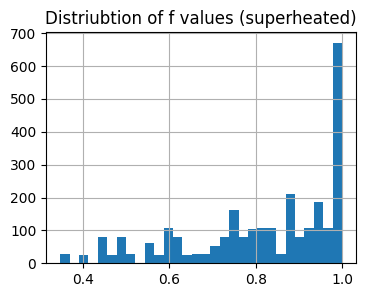

In [274]:
temp.query("f > 0")["f"].hist(bins = 30, figsize = (4,3))
plt.title("Distriubtion of f values (superheated)")
plt.show()

# Overhaul

## Filtering and Standardisation

Only considering relevant input variables and standardizing these as required

In [283]:
processed_data.columns

Index(['ID', 'failure_pressure', 'liquid_pct', 'BLEVE_h', 'vapour_height',
       'vapour_temp', 'liquid_temp', 'obstacle_dist', 'obstacle_w',
       'obstacle_h', 'obstacle_thk', 'obstacle_angle', 'sensor_id',
       'sensor_side', 'tgt_pressure', 'superheated_status', 'event_num',
       'tank_volume', 'sensor_location', 'net_sensor_dist', 'substance'],
      dtype='object')

In [318]:
relevant_cols = ["tgt_pressure",
                 "failure_pressure", 
                 "liquid_pct", 
                 "tank_w", 
                 "tank_l", 
                 "tank_h", 
                 "BLEVE_h", 
                 "vapour_temp", 
                 "liquid_temp", 
                 "superheated_status",
                 "vapour_height",
                 "net_sensor_dist",
                 ## Include obstalce measurements, (thk, angle etc.)
                ]

numeric_cols = [col for col in relevant_cols if col not in ["tgt_pressure","superheated_status"]]

In [319]:
temp = processed_data[relevant_cols]
temp[numeric_cols] = temp[numeric_cols].apply(stats.zscore)

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_19654/1968037114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[numeric_cols] = temp[numeric_cols].apply(stats.zscore)


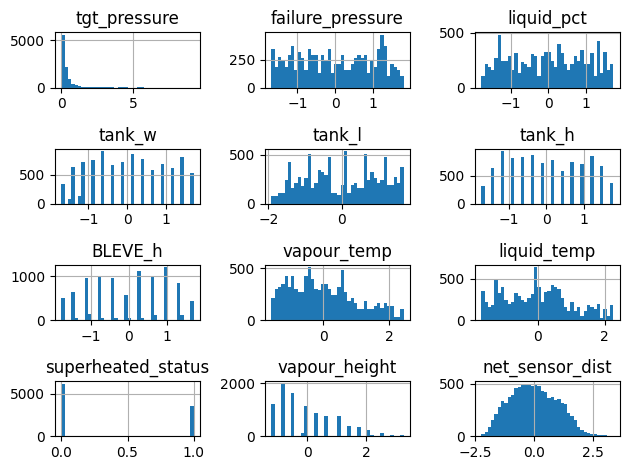

In [320]:
temp.hist(bins = 40)
plt.tight_layout()
plt.show()

In [339]:
qt = sklearn.preprocessing.QuantileTransformer(output_distribution="normal")
tgt_temp = qt.fit_transform(temp[["tgt_pressure"]])
temp["tgt_pressure_quant"] = tgt_temp.clip(-3.5,3.5) # doesn't appear to be anything super special about the extremes, thus squish to rest of data

/var/folders/g1/gcf6wcx125v51909bvw56yxm0000gn/T/ipykernel_19654/1508967927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["tgt_pressure_quant"] = tgt_temp.clip(-3.5,3.5)


<Axes: >

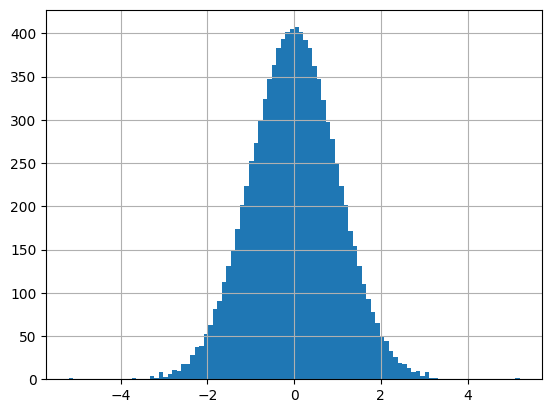

In [337]:
temp["tgt_pressure_quant"].hist(bins = 100)

In [338]:
temp.sort_values("tgt_pressure_quant")

tgt_pressure  failure_pressure  liquid_pct    tank_w    tank_l  \
6529      0.016098         -1.112818   -1.617294 -1.171211 -0.452260   
8496      0.016413          0.745007    1.732869 -1.694099  0.004448   
6526      0.017651         -1.112818   -1.617294 -1.171211 -0.452260   
8495      0.017695          0.745007    1.732869 -1.694099  0.004448   
9779      0.017800         -1.162032    0.983490  1.443229 -0.916644   
...            ...               ...         ...       ...       ...   
3743      5.597202         -0.696393   -1.573213 -0.909767  0.925540   
6856      5.893072          0.307760   -0.867916  1.704673  0.388236   
660       6.492666          0.250975    0.013706  0.658897  1.232570   
663       6.916218          0.250975    0.013706  0.658897  1.232570   
6855      9.170477          0.307760   -0.867916  1.704673  0.388236   

        tank_h   BLEVE_h  vapour_temp  liquid_temp  superheated_status  \
6529 -1.183639  1.351800    -0.457560    -1.687507                 0.0   
8496 -1.451514  0.655160    -0.402476     0.642839                 0.0   
6526 -1.183639  1.351800    -0.457560    -1.687507                 0.0   
8495 -1.451514  0.655160    -0.402476     0.642839                 0.0   
9779  0.691484 -0.407216     1.638118    -1.511877                 0.0   
...        ...       ...          ...          ...                 ...   
3743  0.437003 -0.738120    -0.676503    -1.052754                 0.0   
6856  1.495108 -1.434760     0.612257    -0.390611                 0.0   
660   1.227233  0.655160     0.861663     1.364278                 0.0   
663   1.227233  0.655160     0.861663     1.364278                 0.0   
6855  1.495108 -1.434760     0.612257    -0.390611                 0.0   

      vapour_height  net_sensor_dist  tgt_pressure_quant  
6529      -0.462829        -0.452703           -5.199338  
8496      -1.206733         1.875449           -3.732257  
6526      -0.462829        -1.300894           -3.308815  
8495      -1.206733         1.311318           -3.300915  
9779      -0.462829         1.645644           -3.282933  
...             ...              ...                 ...  
3743       1.768885        -2.144555            3.111575  
6856       2.140838        -1.955209            3.137004  
660        0.653028        -1.787153            3.195772  
663        0.653028        -1.865504            3.245124  
6855       2.140838        -1.951095            5.199338  

[9811 rows x 13 columns]

## Data Splitting

We will again split the data into train and test splits for cross-validation, however, we will also go back to splitting the data into train, validation AND test sets for holdout validation (previously we were doing holdout validation with just the 2 data sets). 

In [148]:
# Holdout validation spltis: train_split, validation_split, test_split
val_train_ratio = 0.7
val_val_ratio = 0.15

n_events = max(raw_data8["event_num"])
val_train_qty = int(val_train_ratio * n_events)
val_val_qty = int(val_val_ratio * n_events) + val_train_qty

ho_train_set = raw_data8[raw_data8["event_num"]<val_train_qty]
ho_validation_set = raw_data8[(raw_data8["event_num"]>=val_train_qty) & (raw_data8["event_num"]<=val_val_qty)]
ho_test_set = raw_data8[raw_data8["event_num"]>val_val_qty]

In [149]:
# Cross-val splits: cv_train_set, cv_test_set 
cv_train_set = train_split.copy()
cv_test_set = validation_split.copy()

In [150]:
# Saving train and val data for each sensor to "data_dict"
ho_data = {}
unique_sensors = ho_train_set["sensor_id"].unique()
unique_sensors.sort()

for sensor in unique_sensors:
    train_data = ho_train_set[ho_train_set['sensor_id'] == sensor]
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = ho_validation_set[ho_validation_set['sensor_id'] == sensor]
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']

    test_data = ho_test_set[ho_test_set['sensor_id'] == sensor]
    X_test = test_data.drop(['tgt_pressure'], axis=1)
    y_test = test_data['tgt_pressure']

    X_test_ext = ext_test[ext_test['sensor_id'] == sensor]
    
    ho_data[sensor] = (X_train, y_train, X_val, y_val, X_test, y_test, X_test_ext)

In [162]:
X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1, X_test_ext_1 = ho_data[1]
X_train_10, y_train_10, X_val_10, y_val_10, X_test_10, y_test_10, X_test_ext_10 = ho_data[10]